# Imports

In [1]:
import pandas as pd
import numpy as np
import networkx as nx

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set_theme()
import analysis_util
import tqdm
import datetime

import nltk 
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import pearsonr, spearmanr

# Data

In [2]:
subreddits = ['FourSentenceStories','Trump666','GraphTheory','jazznoir','indoorbouldering','kiwi_bird','DTU']
period = '2015-01-01-2022-01-01'

df_post_dict = {}
df_comment_dict = {}
df_all_nodes_dict = {}
G_dict = {}
G_di_dict = {}
df_authors_dict = {}
df_comment_post_dict = {}


for subreddit in subreddits:
    print(subreddit)
    path_post='../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_posts.csv"
    path_comment = '../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_comments.csv"
    path_awards = '../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_awards.csv"
    path_awards_comments = '../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_awards_comments.csv"
    
    df_comments=analysis_util.read_comments(path_comment,path_awards_comments)
    df_post=analysis_util.read_posts(path_post,path_awards)
    df_all_nodes=analysis_util.get_all_nodes(df_post,df_comments)    
    G_di = analysis_util.get_DiGraph(df_post,df_comments,df_all_nodes)
    G=analysis_util.get_graph(df_post,df_comments,df_all_nodes)
    G_big=analysis_util.get_biggest_component(G)    
    df_comment_post = analysis_util.get_comment_post_date(df_comments,df_post)
    df_authors = analysis_util.get_authors(G,df_all_nodes,df_comments,df_post,df_comment_post)
    
    df_comment_post_dict[subreddit] = df_comment_post
    df_comment_dict[subreddit] = df_comments
    df_post_dict[subreddit] = df_post
    df_all_nodes_dict[subreddit] = df_all_nodes
    G_dict[subreddit] = G_big
    df_authors_dict[subreddit] = df_authors
    G_di_dict[subreddit] = G_di
    print('')

FourSentenceStories
Removed 0.008264462809917328 of the rows

Trump666
Removed 0.023008849557522026 of the rows

GraphTheory
Removed 0.046391752577319645 of the rows

jazznoir
Removed 0.056192660550458795 of the rows

indoorbouldering
Removed 0.013580246913580174 of the rows

kiwi_bird
Removed 0.01412429378531077 of the rows

DTU
Removed 0.02263374485596703 of the rows



In [3]:
for subreddit in subreddits:
    df_authors_dict[subreddit]['sum_awards'] = df_authors_dict[subreddit]['sum_awards'].astype(int)
    df_authors_dict[subreddit]['award'] = df_authors_dict[subreddit]['sum_awards'] > 0

    df_comment_dict[subreddit]['n_awards'] = df_comment_dict[subreddit]['n_awards'].astype(int)
    df_comment_dict[subreddit]['award'] = df_comment_dict[subreddit]['n_awards'] > 0

    df_post_dict[subreddit]['n_awards'] = df_post_dict[subreddit]['n_awards'].fillna(0)
    df_post_dict[subreddit]['n_awards'] = df_post_dict[subreddit]['n_awards'].astype(int)
    df_post_dict[subreddit]['award'] = df_post_dict[subreddit]['n_awards'] > 0

In [4]:
df_authors_dict['DTU'].loc[df_authors_dict['DTU']['award'] == True]

Activity  Average Neighbor Degree  Clustering Coefficient  \
LeCyberDucky             96                 7.594203                0.017903   
youngchul                12                18.142857                0.095238   
PretentiousTomato         8                 7.285714                0.095238   
Theagurg                  7                16.000000                0.000000   
SemiLemonPie              7                14.400000                0.155556   
jonathan6405              5                 4.600000                0.000000   
QueensTarget              5                32.000000                0.000000   
Wobblebiscuit             4                 8.800000                0.100000   

                   Eigenvector Centrality  Closeness Centrality  \
LeCyberDucky                     0.407508              0.354806   
youngchul                        0.077459              0.273060   
PretentiousTomato                0.029392              0.243269   
Theagurg                         0.037115              0.257012   
SemiLemonPie                     0.089879              0.277355   
jonathan6405                     0.007476              0.213447   
QueensTarget                     0.061939              0.278864   
Wobblebiscuit                    0.024191              0.245279   

                   Degree Centrality  Betweenness Centrality  degree  \
LeCyberDucky                0.100291                0.265163      69   
youngchul                   0.010174                0.005406       7   
PretentiousTomato           0.010174                0.006698       7   
Theagurg                    0.007267                0.016570       5   
SemiLemonPie                0.014535                0.010283      10   
jonathan6405                0.007267                0.001703       5   
QueensTarget                0.005814                0.006570       4   
Wobblebiscuit               0.007267                0.004629       5   

                        type  mean_score  sum_score  mean_awards  sum_awards  \
LeCyberDucky            both    2.020833        194     0.010417           1   
youngchul          commenter    1.333333         16     0.166667           2   
PretentiousTomato  commenter    1.875000         15     0.125000           1   
Theagurg                both    1.857143         13     0.285714           2   
SemiLemonPie            both    0.857143          6     0.142857           1   
jonathan6405       commenter    2.000000         10     0.400000           2   
QueensTarget            both    1.400000          7     0.200000           1   
Wobblebiscuit      commenter    2.250000          9     0.250000           1   

                   award  
LeCyberDucky        True  
youngchul           True  
PretentiousTomato   True  
Theagurg            True  
SemiLemonPie        True  
jonathan6405        True  
QueensTarget        True  
Wobblebiscuit       True

In [5]:
#old
df_authors_dict['DTU'].loc[df_authors_dict['DTU']['award'] == True]

Activity  Average Neighbor Degree  Clustering Coefficient  \
LeCyberDucky             96                 7.594203                0.017903   
youngchul                12                18.142857                0.095238   
PretentiousTomato         8                 7.285714                0.095238   
Theagurg                  7                16.000000                0.000000   
SemiLemonPie              7                14.400000                0.155556   
jonathan6405              5                 4.600000                0.000000   
QueensTarget              5                32.000000                0.000000   
Wobblebiscuit             4                 8.800000                0.100000   

                   Eigenvector Centrality  Closeness Centrality  \
LeCyberDucky                     0.407508              0.354806   
youngchul                        0.077459              0.273060   
PretentiousTomato                0.029392              0.243269   
Theagurg                         0.037115              0.257012   
SemiLemonPie                     0.089879              0.277355   
jonathan6405                     0.007476              0.213447   
QueensTarget                     0.061939              0.278864   
Wobblebiscuit                    0.024191              0.245279   

                   Degree Centrality  Betweenness Centrality  degree  \
LeCyberDucky                0.100291                0.265163      69   
youngchul                   0.010174                0.005406       7   
PretentiousTomato           0.010174                0.006698       7   
Theagurg                    0.007267                0.016570       5   
SemiLemonPie                0.014535                0.010283      10   
jonathan6405                0.007267                0.001703       5   
QueensTarget                0.005814                0.006570       4   
Wobblebiscuit               0.007267                0.004629       5   

                        type  mean_score  sum_score  mean_awards  sum_awards  \
LeCyberDucky            both    2.020833        194     0.010417           1   
youngchul          commenter    1.333333         16     0.166667           2   
PretentiousTomato  commenter    1.875000         15     0.125000           1   
Theagurg                both    1.857143         13     0.285714           2   
SemiLemonPie            both    0.857143          6     0.142857           1   
jonathan6405       commenter    2.000000         10     0.400000           2   
QueensTarget            both    1.400000          7     0.200000           1   
Wobblebiscuit      commenter    2.250000          9     0.250000           1   

                   award  
LeCyberDucky        True  
youngchul           True  
PretentiousTomato   True  
Theagurg            True  
SemiLemonPie        True  
jonathan6405        True  
QueensTarget        True  
Wobblebiscuit       True

In [6]:
# a color for each subreddit in a dictionary
color_dict = {'FourSentenceStories':'#FF0000','Trump666':'#FFA500','GraphTheory':'#FF1493','jazznoir':'#008000','indoorbouldering':'#0000FF','kiwi_bird':'#800080','DTU':'#FFD700','Wallstreetbets': '#3cc406'}

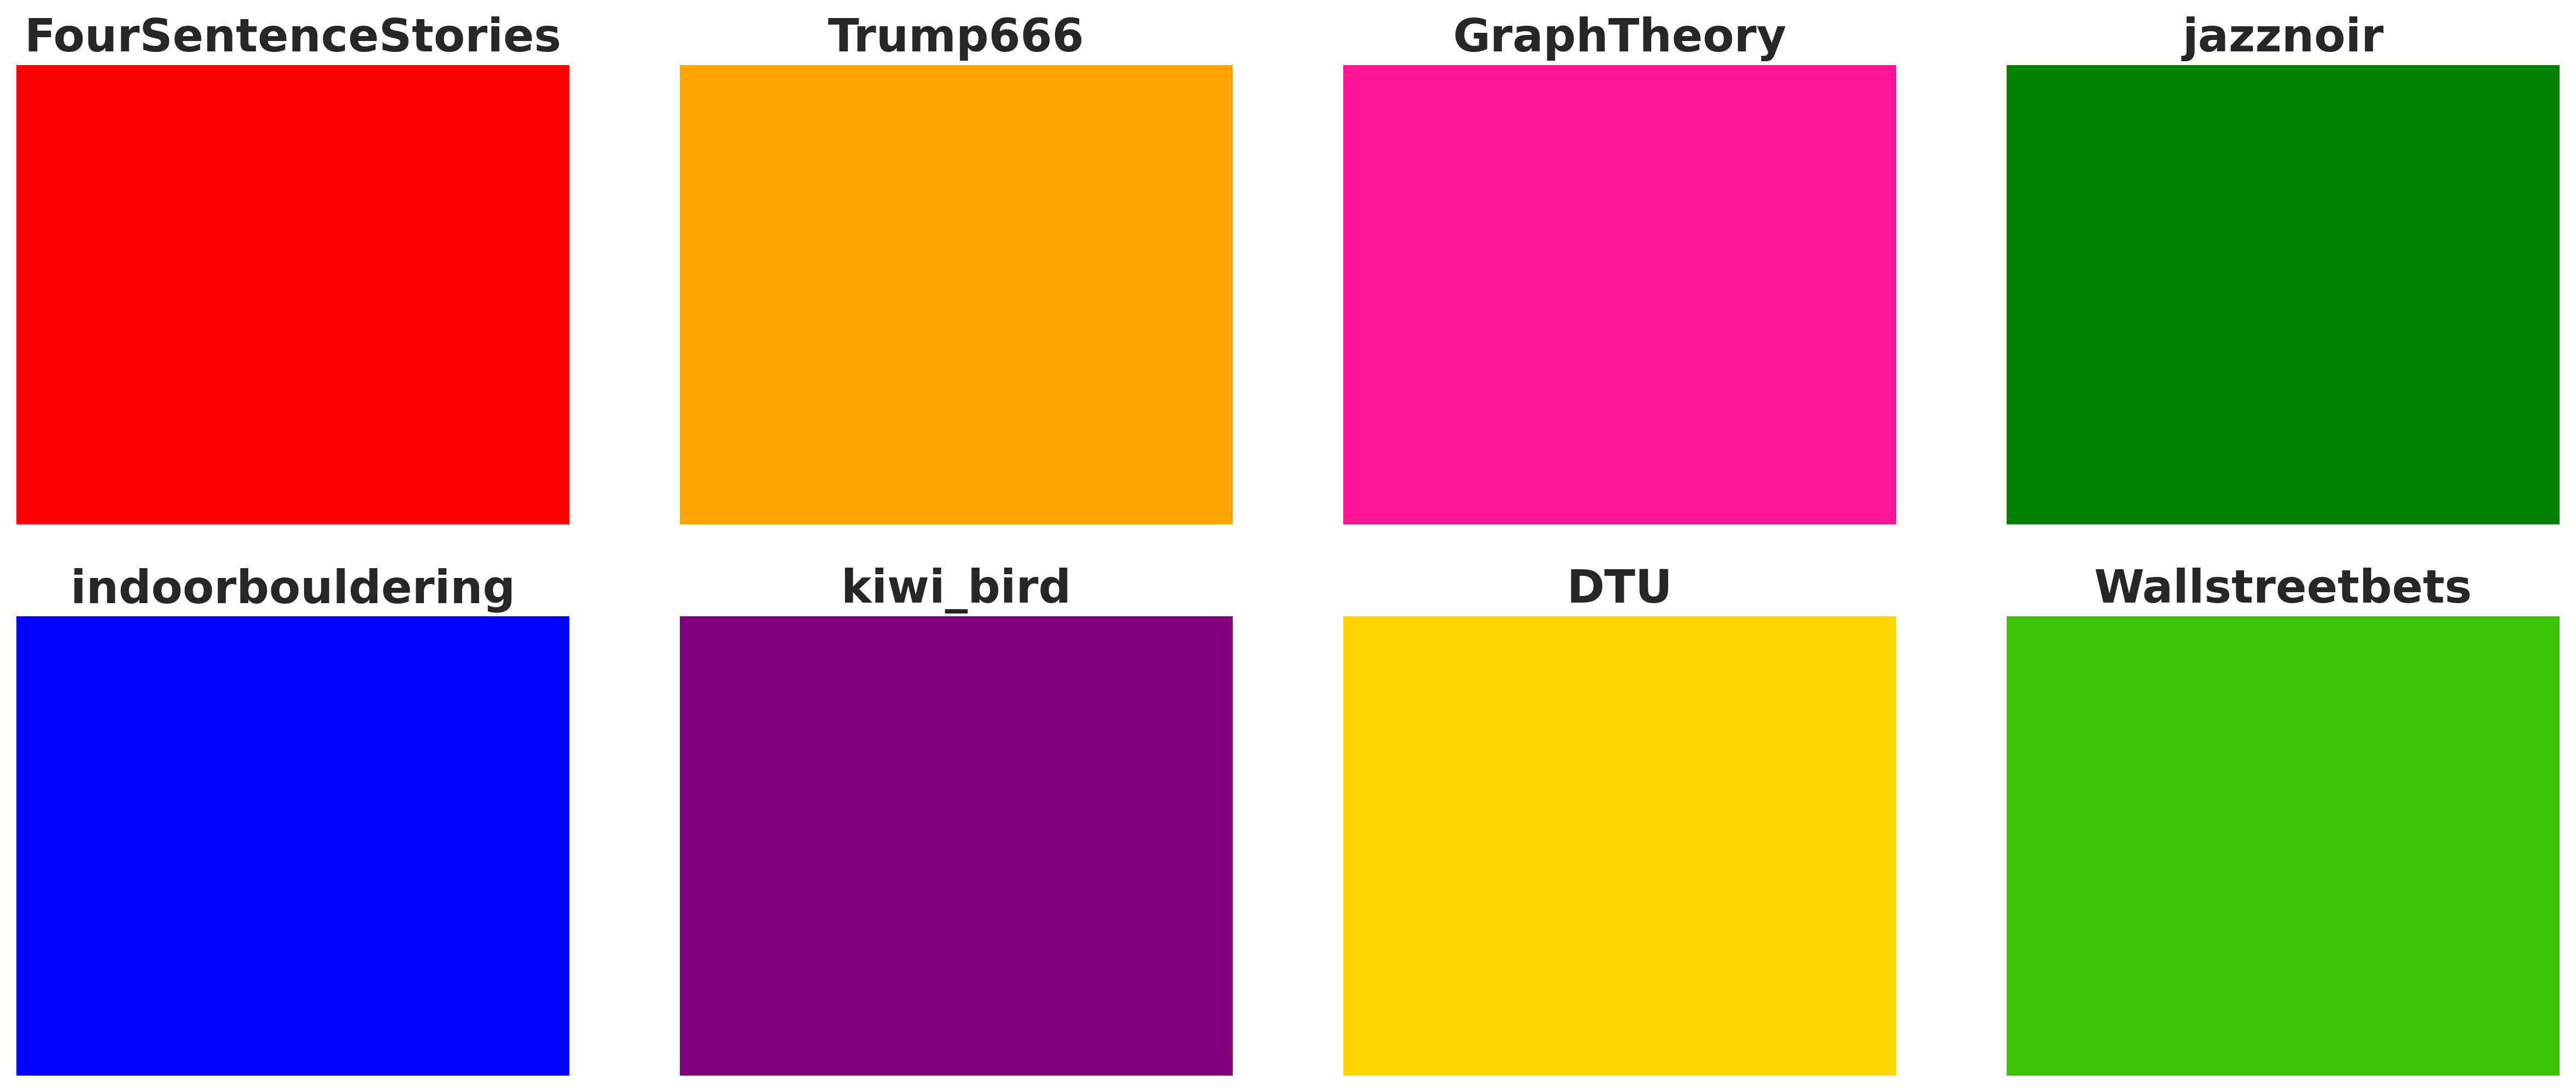

In [7]:
# # plot boxplot for each subreddit
# 4 by 4 plot
fig, axs = plt.subplots(2, 4, figsize=(20, 8), dpi=300)
axs = axs.ravel()
i = 0
for subreddit in color_dict.keys():
    
    color = color_dict[subreddit]
    axs[i].add_patch(mpatches.Rectangle((0, 0), 1, 1, color=color))

    axs[i].axis('off')
    axs[i].set_title(subreddit, fontsize=20, fontweight='bold')
    i = i + 1
plt.show()

# Activity Grouping

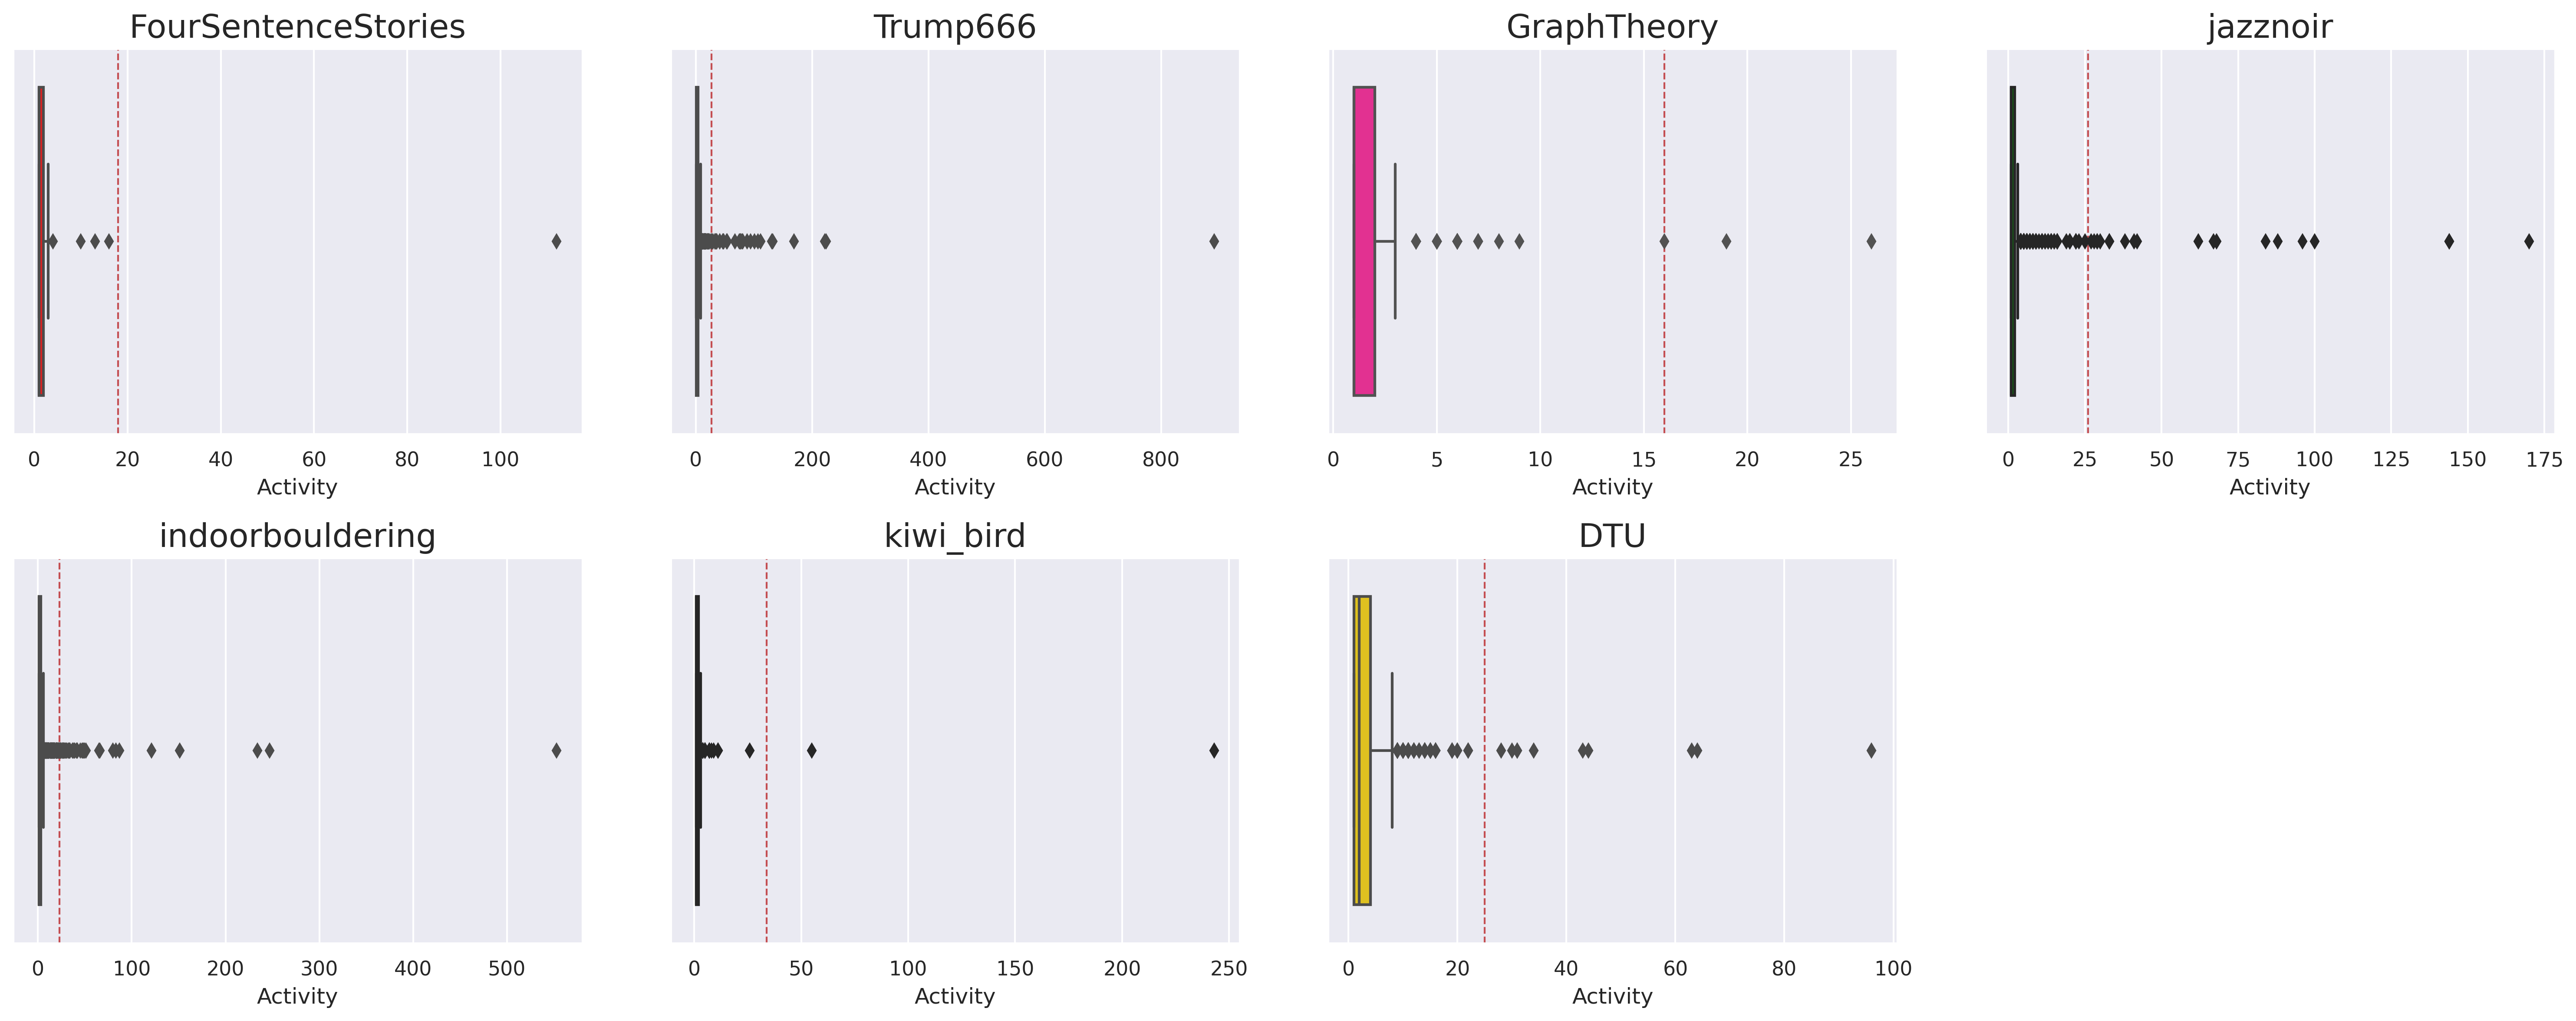

In [8]:
# plot boxplot for each subreddit
# 4 by 4 plot
fig, axs = plt.subplots(2, 4, figsize=(20, 8), dpi=300)
axs = axs.ravel()
i = 0
for subreddit in subreddits:
    q_75=df_authors_dict[subreddit].loc[df_authors_dict[subreddit]['degree']>10,'degree'].quantile([0.25,0.5,0.75]).values[2]
    # line
    axs[i].axvline(q_75, color='r', linestyle='dashed', linewidth=1, label='Group "6" threshold')
    color = color_dict[subreddit]
    sns.boxplot(x="Activity", data=df_authors_dict[subreddit], ax=axs[i], palette=[color, 'grey'])
    axs[i].set_title(subreddit,size=18)
    i = i + 1

plt.tight_layout()
axs[i].axis('off')
plt.show()

In [9]:
for sub in subreddits:
    q_25=df_authors_dict[sub].loc[df_authors_dict[sub]['Activity']>10,'Activity'].quantile([0.25,0.5,0.75]).values[0]
    q_50=df_authors_dict[sub].loc[df_authors_dict[sub]['Activity']>10,'Activity'].quantile([0.25,0.5,0.75]).values[1]
    q_75=df_authors_dict[sub].loc[df_authors_dict[sub]['Activity']>10,'Activity'].quantile([0.25,0.5,0.75]).values[2]
    
    df_authors_dict[sub]['Activity_group'] = 0
    df_authors_dict[sub].loc[df_authors_dict[sub]['Activity']<=3,'Activity_group'] = 1
    df_authors_dict[sub].loc[(df_authors_dict[sub]['Activity']>3) & (df_authors_dict[sub]['Activity']<=10),'Activity_group'] = 2

    df_authors_dict[sub].loc[(df_authors_dict[sub]['Activity']>10) & (df_authors_dict[sub]['Activity']<=q_25),'Activity_group'] = 3
    df_authors_dict[sub].loc[(df_authors_dict[sub]['Activity']>q_25) & (df_authors_dict[sub]['Activity']<=q_50),'Activity_group'] = 4
    df_authors_dict[sub].loc[(df_authors_dict[sub]['Activity']>q_50) & (df_authors_dict[sub]['Activity']<=q_75),'Activity_group'] = 5
    df_authors_dict[sub].loc[df_authors_dict[sub]['Activity']>q_75,'Activity_group'] = 6

In [10]:
for sub in subreddits:
    q_25=df_authors_dict[sub].loc[df_authors_dict[sub]['degree']>10,'degree'].quantile([0.25,0.5,0.75]).values[0]
    q_50=df_authors_dict[sub].loc[df_authors_dict[sub]['degree']>10,'degree'].quantile([0.25,0.5,0.75]).values[1]
    q_75=df_authors_dict[sub].loc[df_authors_dict[sub]['degree']>10,'degree'].quantile([0.25,0.5,0.75]).values[2]
    
    df_authors_dict[sub]['degree_group'] = 0
    df_authors_dict[sub].loc[df_authors_dict[sub]['degree']<=3,'degree_group'] = 1
    df_authors_dict[sub].loc[(df_authors_dict[sub]['degree']>3) & (df_authors_dict[sub]['degree']<=10),'degree_group'] = 2

    df_authors_dict[sub].loc[(df_authors_dict[sub]['degree']>10) & (df_authors_dict[sub]['degree']<=q_25),'degree_group'] = 3
    df_authors_dict[sub].loc[(df_authors_dict[sub]['degree']>q_25) & (df_authors_dict[sub]['degree']<=q_50),'degree_group'] = 4
    df_authors_dict[sub].loc[(df_authors_dict[sub]['degree']>q_50) & (df_authors_dict[sub]['degree']<=q_75),'degree_group'] = 5
    df_authors_dict[sub].loc[df_authors_dict[sub]['degree']>q_75,'degree_group'] = 6

In [11]:
df_authors = pd.concat(df_authors_dict)
df_authors = df_authors.reset_index()
df_authors = df_authors.rename(columns={'level_0':'subreddit'})
df_authors['mean_awards'].replace(np.nan, 0, inplace=True)

for sub in subreddits:
    df_authors.loc[df_authors['subreddit']==sub,'graph_size'] = len(G_dict[sub].nodes)
    df_authors.loc[df_authors['subreddit']==sub,'graph_edges'] = len(G_dict[sub].edges)

# Awards

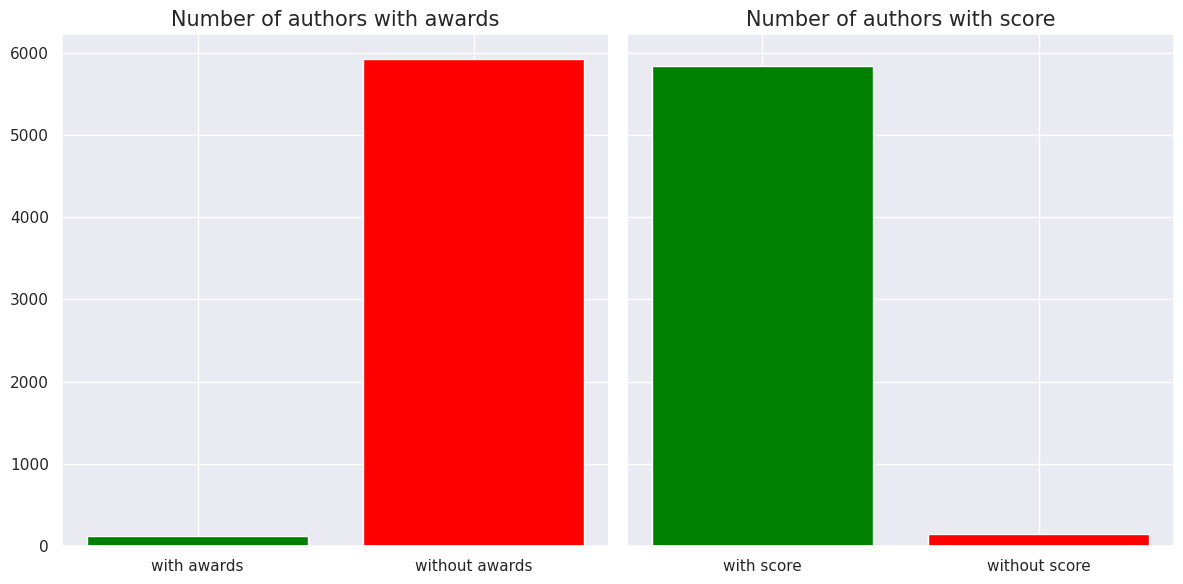

In [12]:
# # # # count number of authors with awards
A = 0
na = 0
for subreddit in subreddits:
#     df_authors_dict[subreddit]['sum_awards']=df_authors_dict[subreddit].sum_awards.astype(int)
    A=df_authors_dict[subreddit][df_authors_dict[subreddit]['sum_awards'] > 0]['sum_awards'].count()  + A
    na=df_authors_dict[subreddit][df_authors_dict[subreddit]['sum_awards'] < 1]['sum_awards'].count() + na

s = 0
ns = 0
for subreddit in subreddits:
#     df_authors_dict[subreddit]['sum_awards']=df_authors_dict[subreddit].sum_awards.astype(int)
    s=df_authors_dict[subreddit][df_authors_dict[subreddit]['sum_score'] > 0]['sum_score'].count()  + s
    ns=df_authors_dict[subreddit][df_authors_dict[subreddit]['sum_score'] == 0]['sum_score'].count() + ns

# plot subfigure
fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=True)
axs[0].bar(['with awards','without awards'],[A,na],color=['#008000','#FF0000'])
axs[0].set_title('Number of authors with awards',fontsize=15)
axs[1].bar(['with score','without score'],[s,ns],color=['#008000','#FF0000'])
axs[1].set_title('Number of authors with score',fontsize=15)

plt.tight_layout()
plt.show()


In [13]:
print('Number of authors with awards: ',A)
print('Number of authors without awards: ',na)

Number of authors with awards:  122
Number of authors without awards:  5931


# Correlations

/home/pelle/anaconda3/envs/py39/lib/python3.9/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


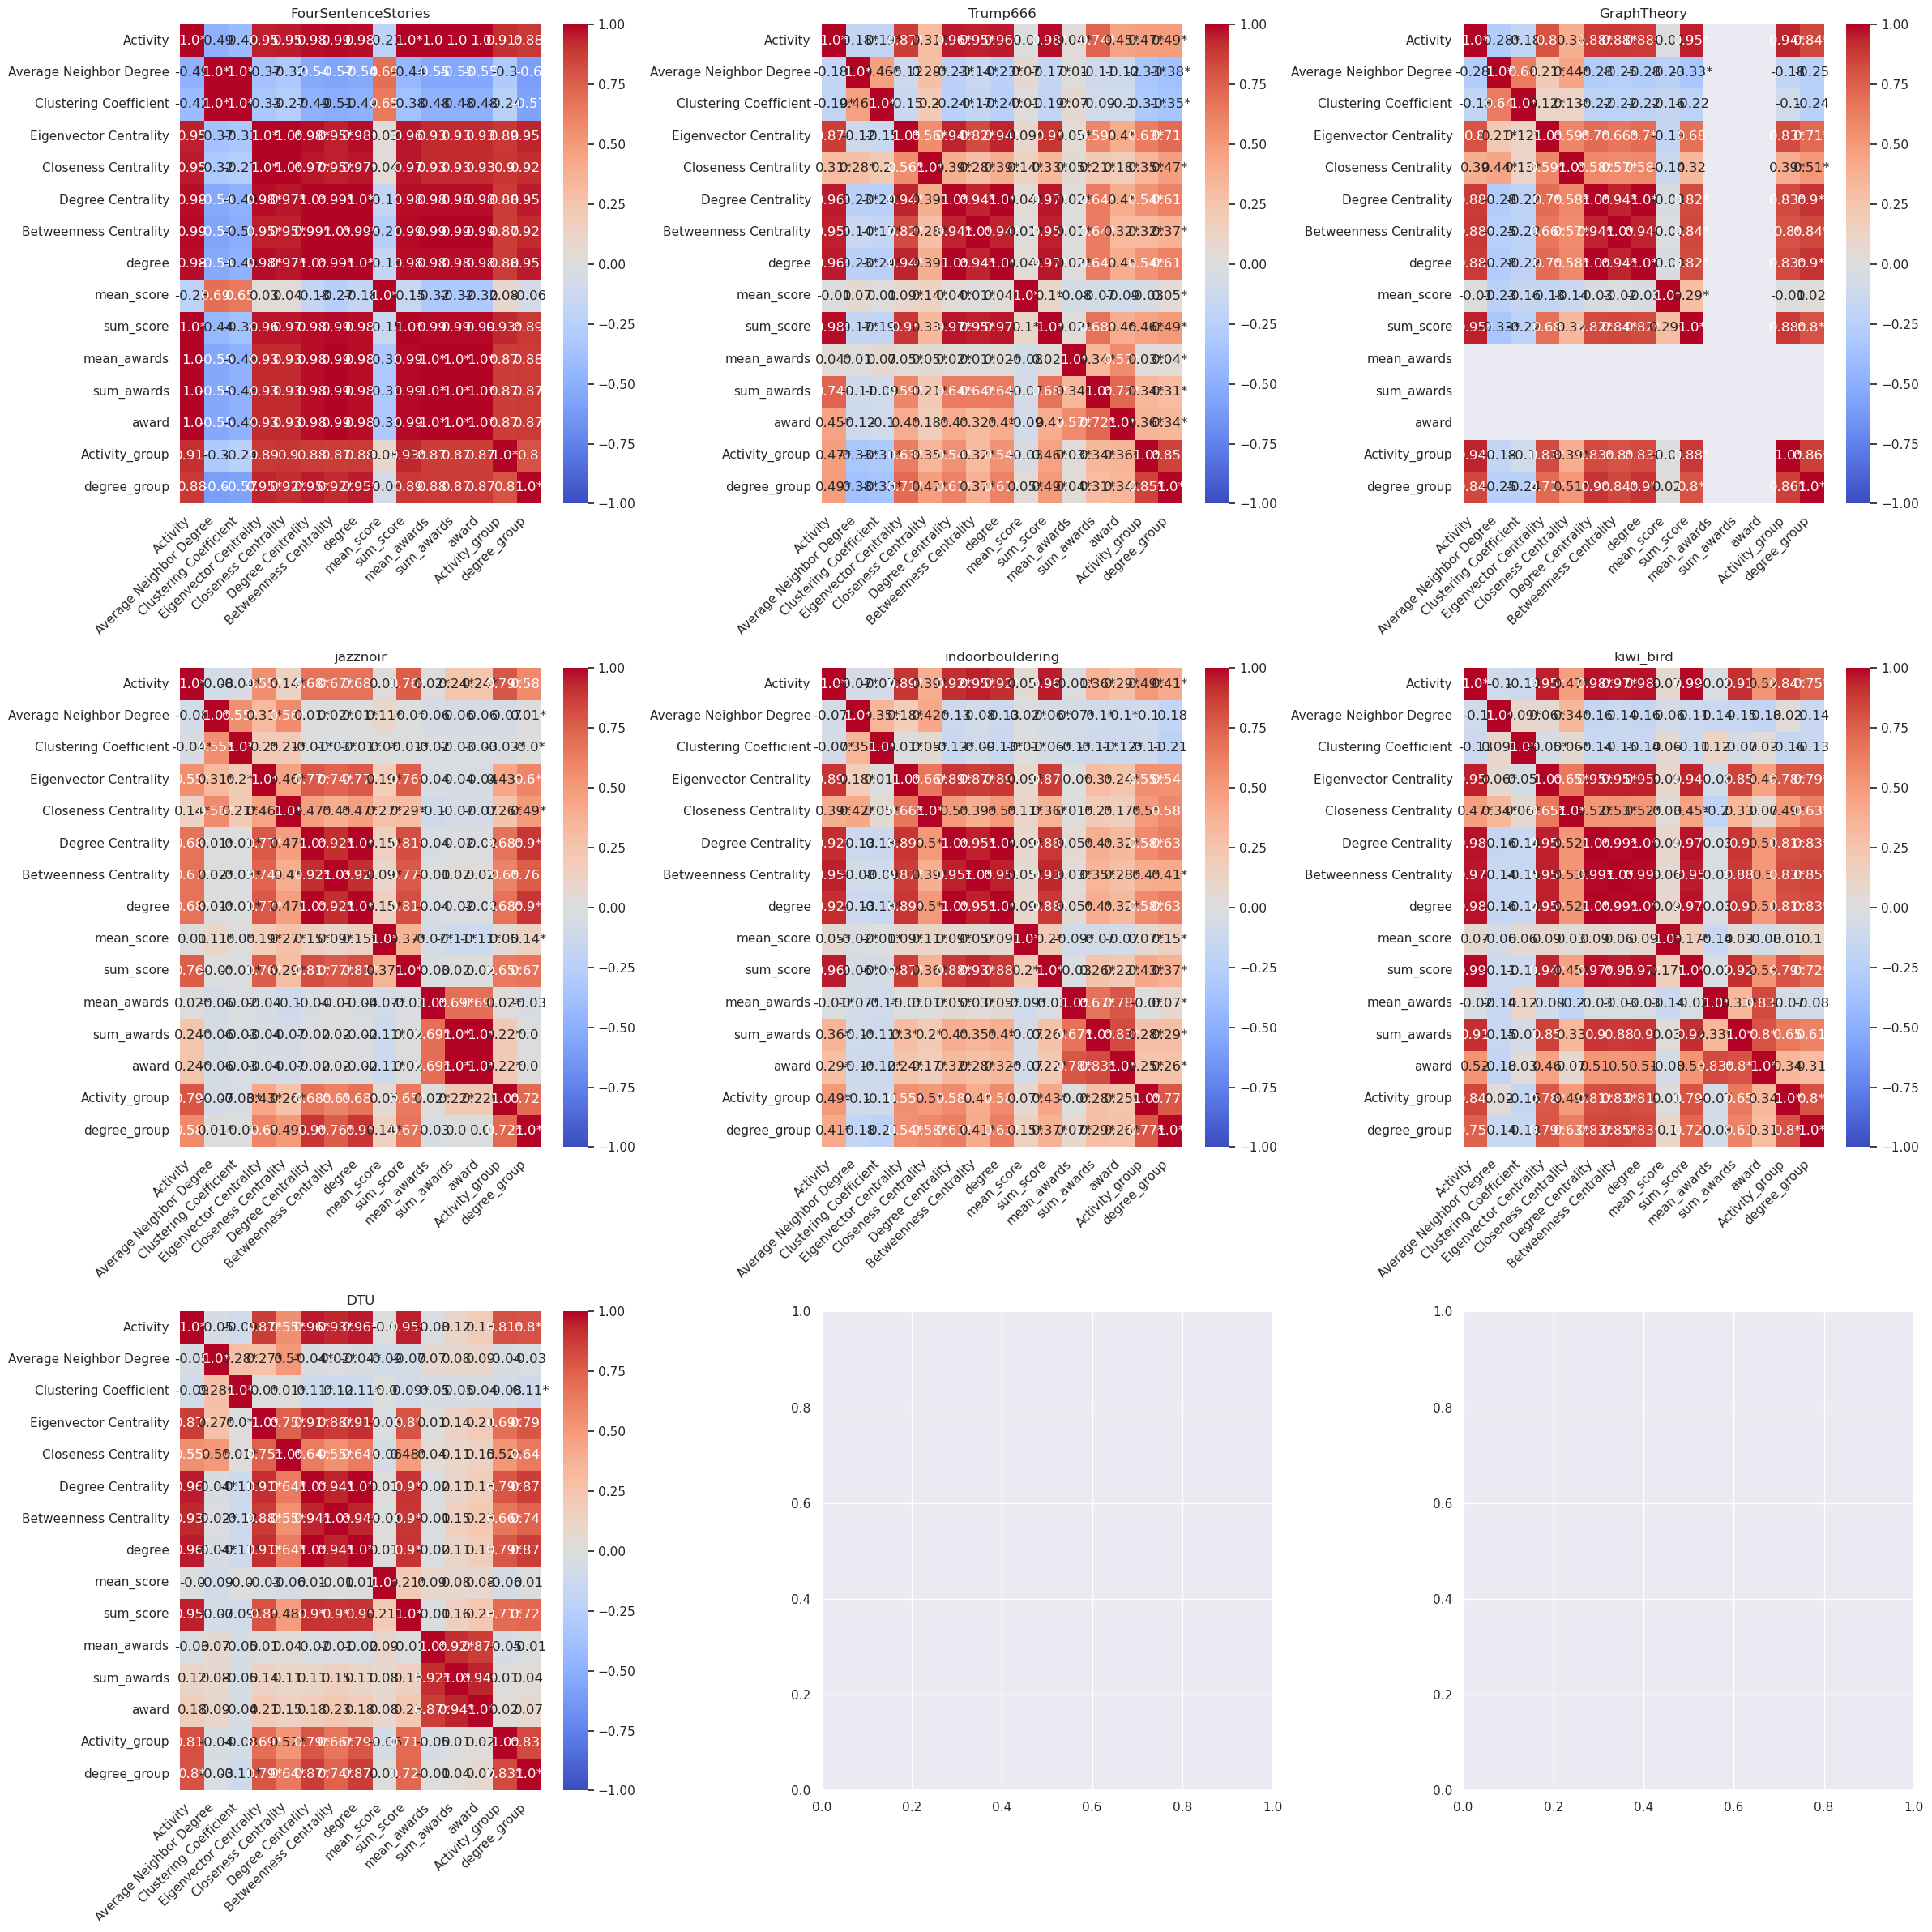

In [14]:
# only for Activity higher than 5
fig, axs = plt.subplots(3, 3, figsize=(8*3,8*3))
axs = axs.flatten()
for i,subreddit in enumerate(subreddits):
    rho = df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>3].corr()
    pval = df_authors_dict[subreddit][df_authors_dict[subreddit]['Activity']>3].corr(method=lambda x, y: spearmanr(x, y)[1]) - np.eye(*rho.shape)
    p = pval.applymap(lambda x: ''.join(['*' for t in [0.05] if x<=t]))
    
    # print(pval)

    sns.heatmap(data=rho, annot=(np.array(rho.round(2).astype(str) + p)),fmt = '',vmin=-1,vmax=1,cmap='coolwarm',ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=45, horizontalalignment='right')
    axs[i].set_title(subreddit)

plt.tight_layout()
plt.show()

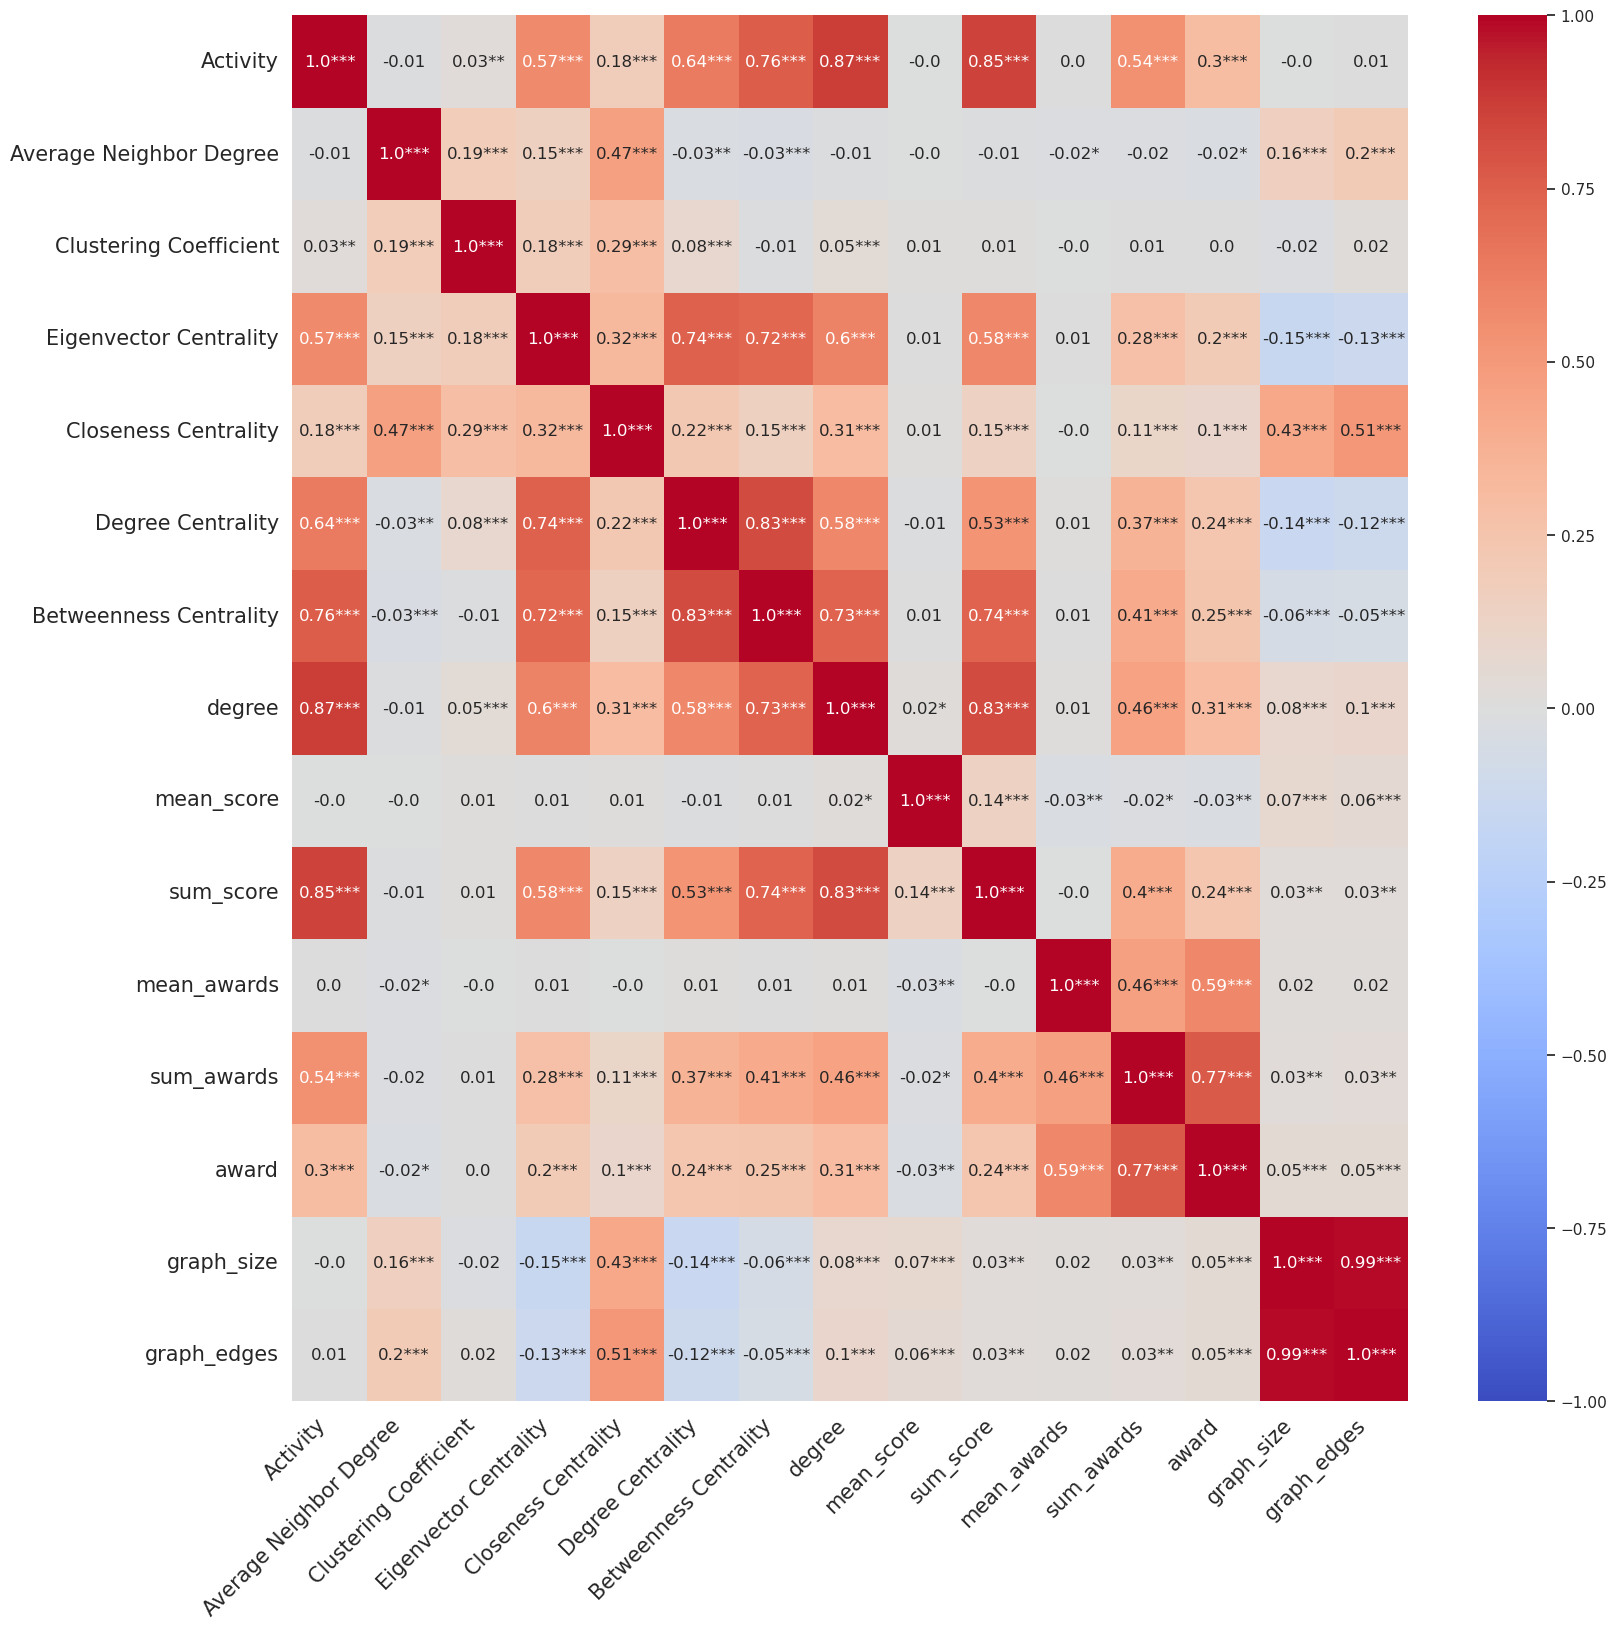

In [15]:
rho = df_authors.drop(columns=['Activity_group','degree_group']).corr()
pval = df_authors.drop(columns=['Activity_group','degree_group']).corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))

fig, ax = plt.subplots(figsize=(18,18))

sns.heatmap(data=rho, annot=(np.array(rho.round(2).astype(str) + p)),fmt = '',vmin=-1,vmax=1,cmap='coolwarm')

# rotate xticks
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right',fontsize=15)
ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)

plt.savefig('correlation_matrix.png',dpi=300)
plt.show()

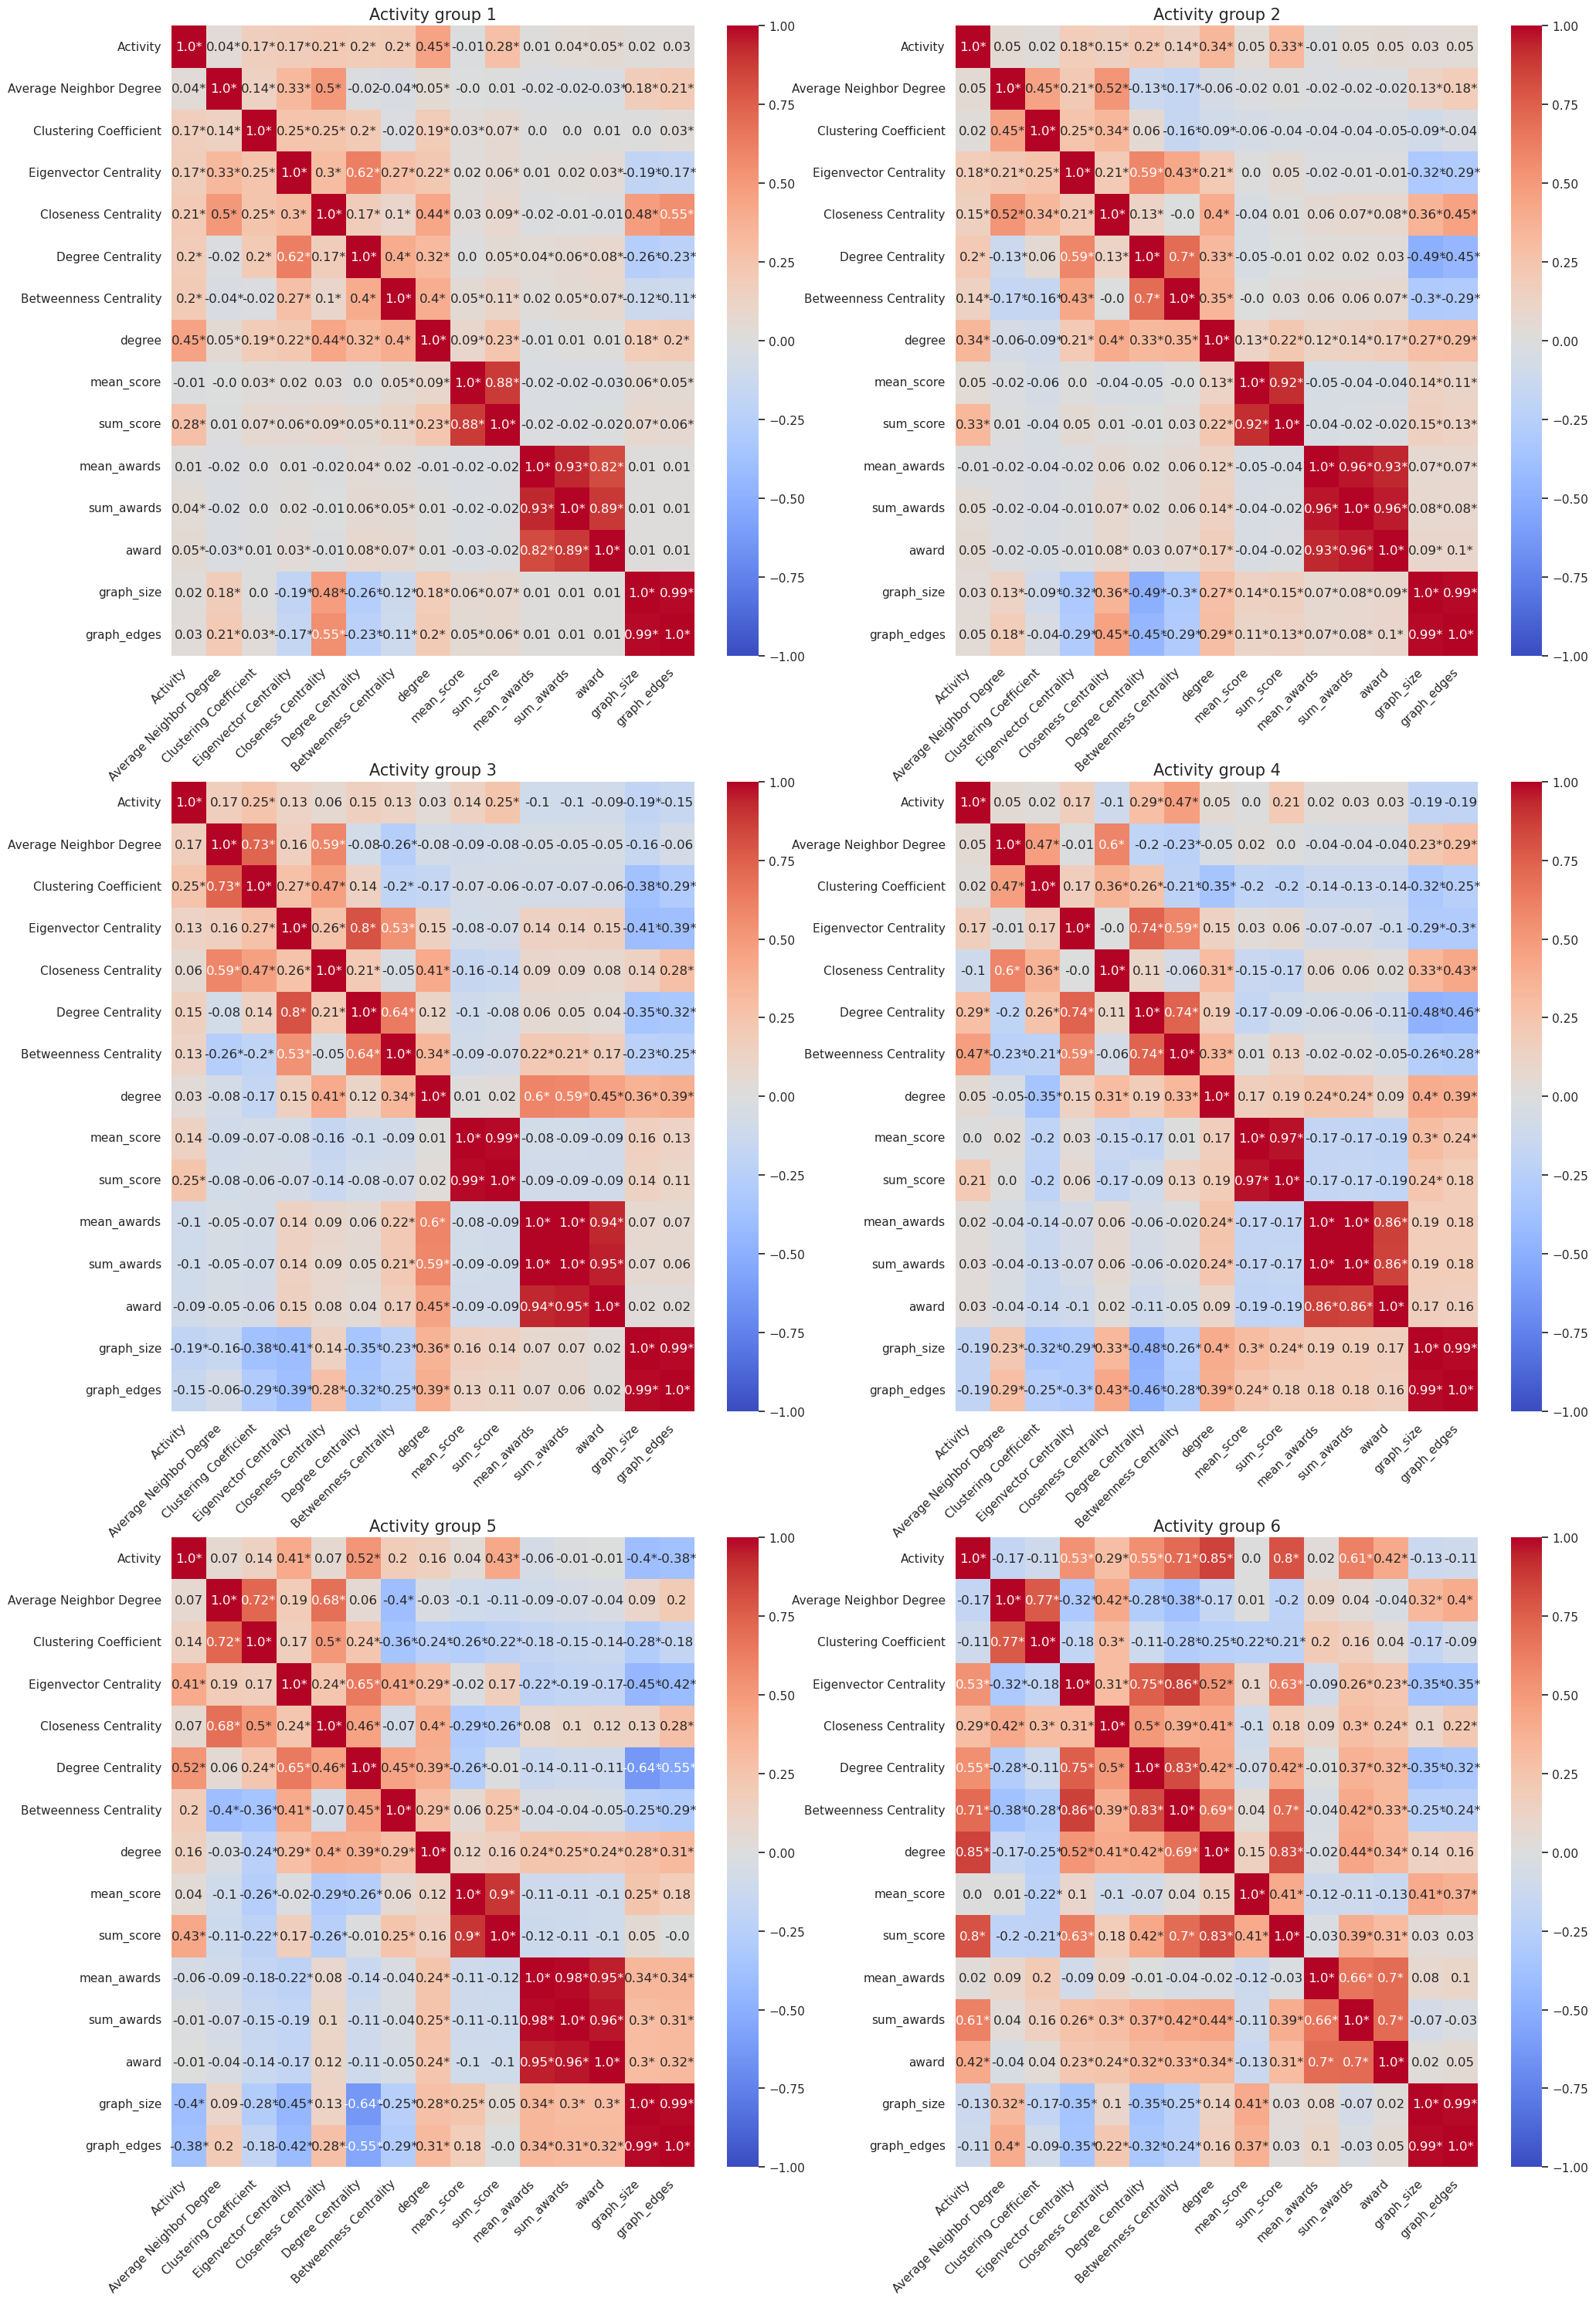

In [16]:
fig, axs = plt.subplots(3, 2, figsize=(12*2,12*3))
axs = axs.flatten()

for i in range(1,7):
    d=df_authors.loc[df_authors['Activity_group']==i]
    d=d.drop(columns=['Activity_group','degree_group'])
    rho = d.corr()
    pval = d.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*rho.shape)
    p = pval.applymap(lambda x: ''.join(['*' for t in [0.05] if x<=t]))

    sns.heatmap(data=rho, annot=(np.array(rho.round(2).astype(str) + p)),fmt = '',vmin=-1,vmax=1,cmap='coolwarm',ax=axs[i-1])

    axs[i-1].set_xticklabels(axs[i-1].get_xticklabels(), rotation=45, horizontalalignment='right')
    axs[i-1].set_title('Activity group '+str(i),fontsize=15)

plt.show()

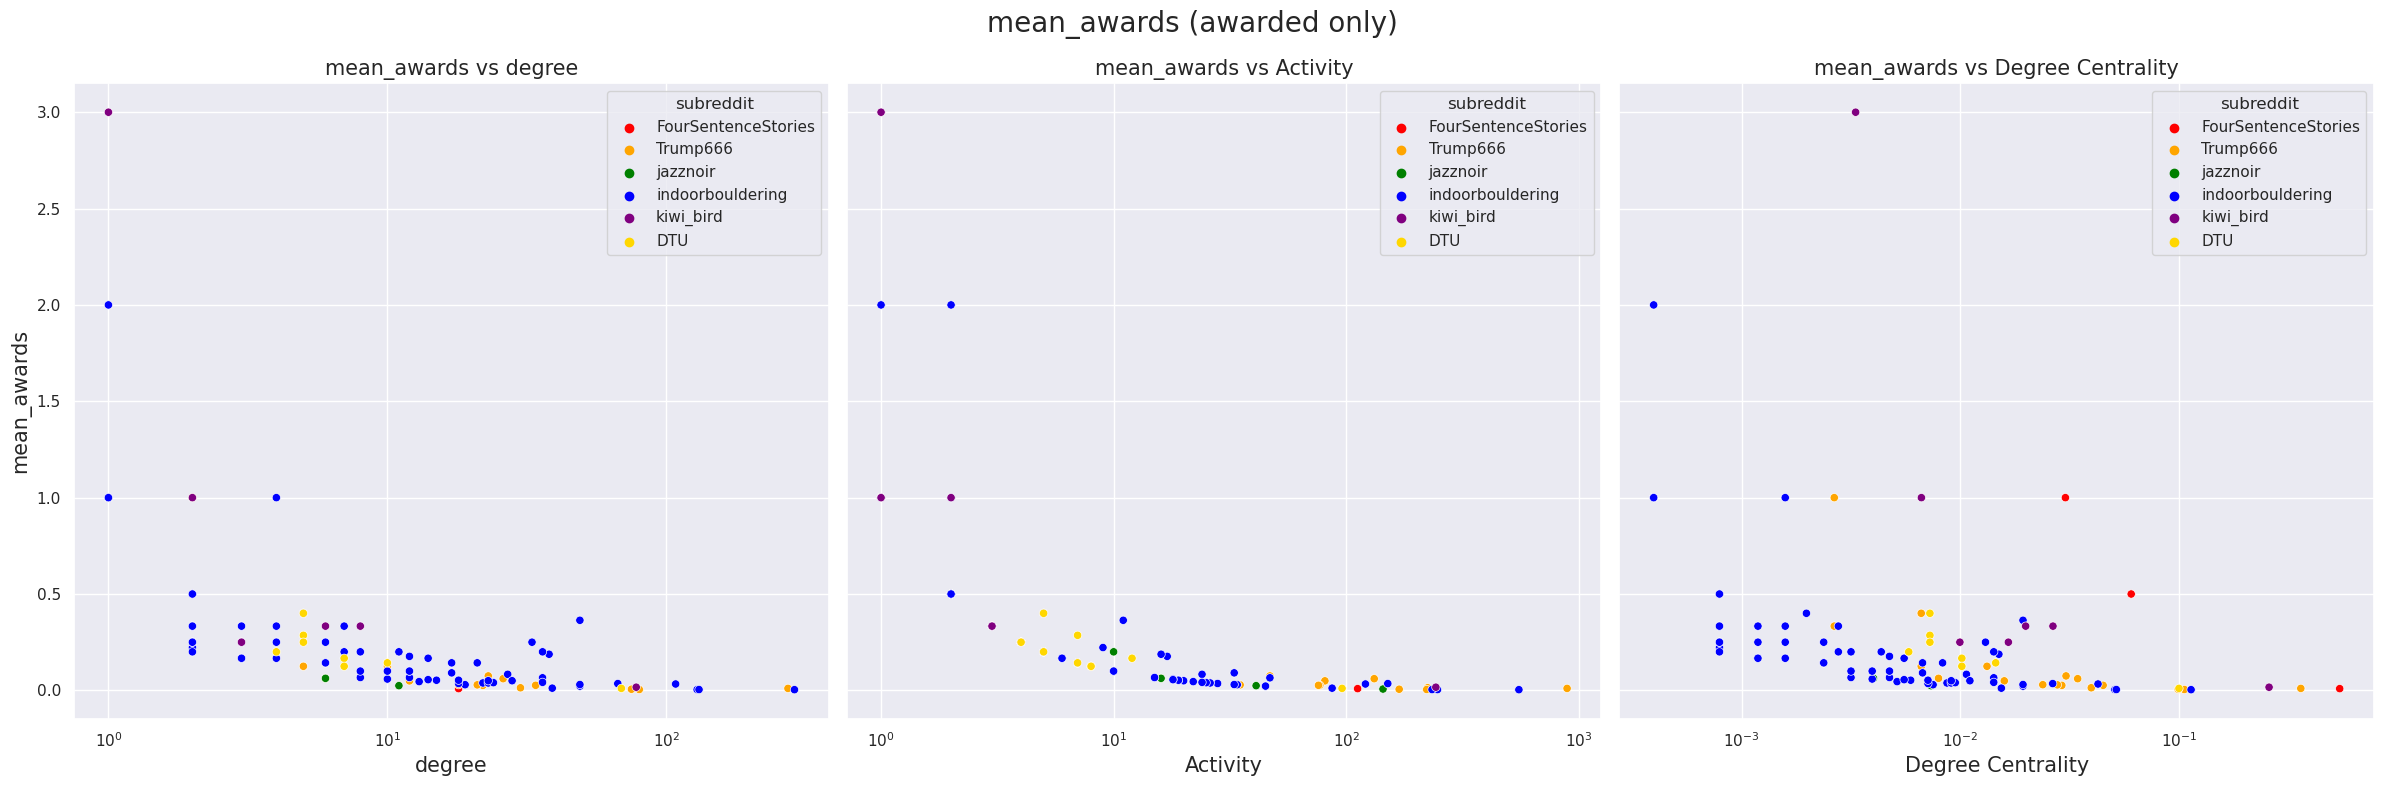

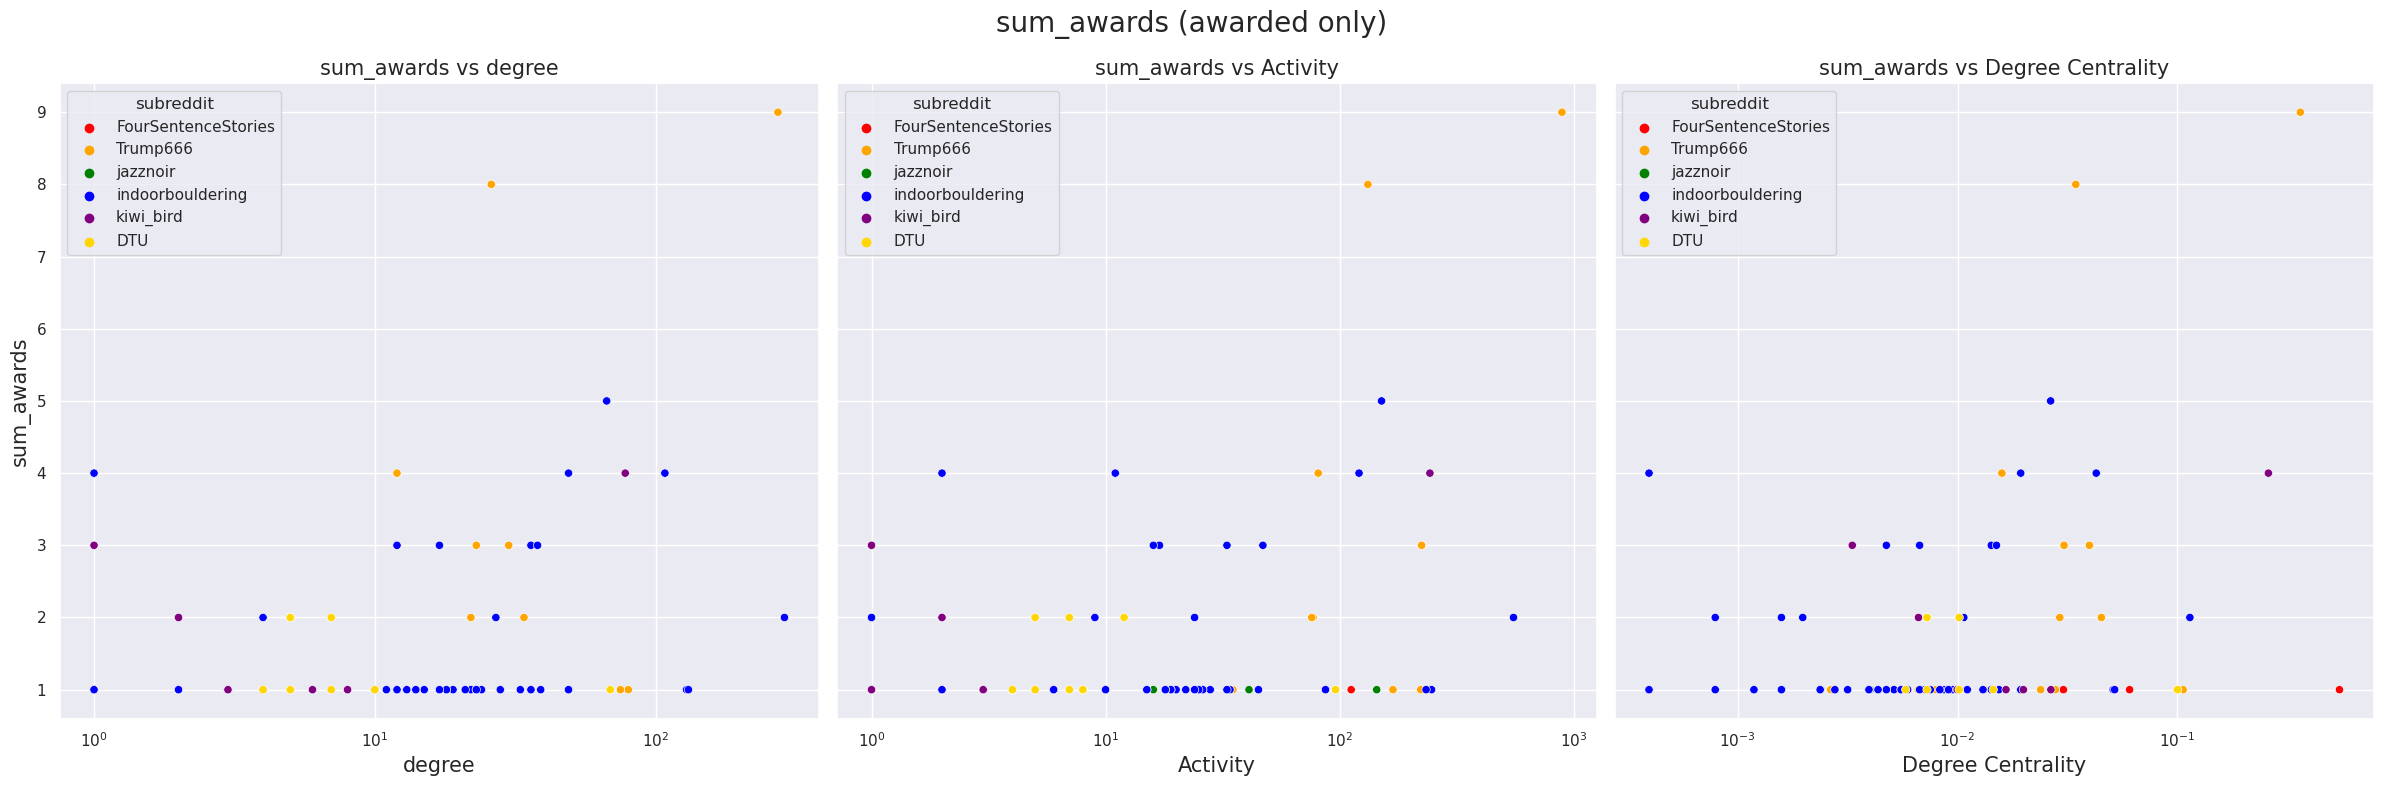

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(8*3,8*1),sharey=True)
axs = axs.flatten()
sns.scatterplot(y='mean_awards',x='degree',hue='subreddit',data=df_authors.loc[df_authors.mean_awards>0],palette=color_dict,ax=axs[0])
axs[0].set_title('mean_awards vs degree',fontsize=15)
axs[0].set_xscale('log')
axs[0].set_ylabel('mean_awards',fontsize=15)
axs[0].set_xlabel('degree',fontsize=15)

sns.scatterplot(y='mean_awards',x='Activity',hue='subreddit',data=df_authors.loc[df_authors.mean_awards>0],palette=color_dict,ax=axs[1])
axs[1].set_title('mean_awards vs Activity',fontsize=15)
axs[1].set_xscale('log')
axs[1].set_ylabel('mean_awards',fontsize=15)
axs[1].set_xlabel('Activity',fontsize=15)

sns.scatterplot(y='mean_awards',x='Degree Centrality',hue='subreddit',data=df_authors.loc[df_authors.mean_awards>0],palette=color_dict,ax=axs[2])
axs[2].set_title('mean_awards vs Degree Centrality',fontsize=15)
axs[2].set_ylabel('mean_awards',fontsize=15)
axs[2].set_xlabel('Degree Centrality',fontsize=15)
axs[2].set_xscale('log')
plt.suptitle('mean_awards (awarded only)',fontsize=20)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(8*3,8*1),sharey=True)
axs = axs.flatten()
sns.scatterplot(y='sum_awards',x='degree',hue='subreddit',data=df_authors.loc[df_authors.sum_awards>0],palette=color_dict,ax=axs[0])
axs[0].set_title('sum_awards vs degree',fontsize=15)
axs[0].set_xscale('log')
axs[0].set_ylabel('sum_awards',fontsize=15)
axs[0].set_xlabel('degree',fontsize=15)

sns.scatterplot(y='sum_awards',x='Activity',hue='subreddit',data=df_authors.loc[df_authors.sum_awards>0],palette=color_dict,ax=axs[1])
axs[1].set_title('sum_awards vs Activity',fontsize=15)
axs[1].set_xscale('log')
axs[1].set_ylabel('sum_awards',fontsize=15)
axs[1].set_xlabel('Activity',fontsize=15)

sns.scatterplot(y='sum_awards',x='Degree Centrality',hue='subreddit',data=df_authors.loc[df_authors.sum_awards>0],palette=color_dict,ax=axs[2])
axs[2].set_title('sum_awards vs Degree Centrality',fontsize=15)
axs[2].set_ylabel('sum_awards',fontsize=15)
axs[2].set_xlabel('Degree Centrality',fontsize=15)
axs[2].set_xscale('log')

plt.suptitle('sum_awards (awarded only)',fontsize=20)
plt.tight_layout()
plt.show()

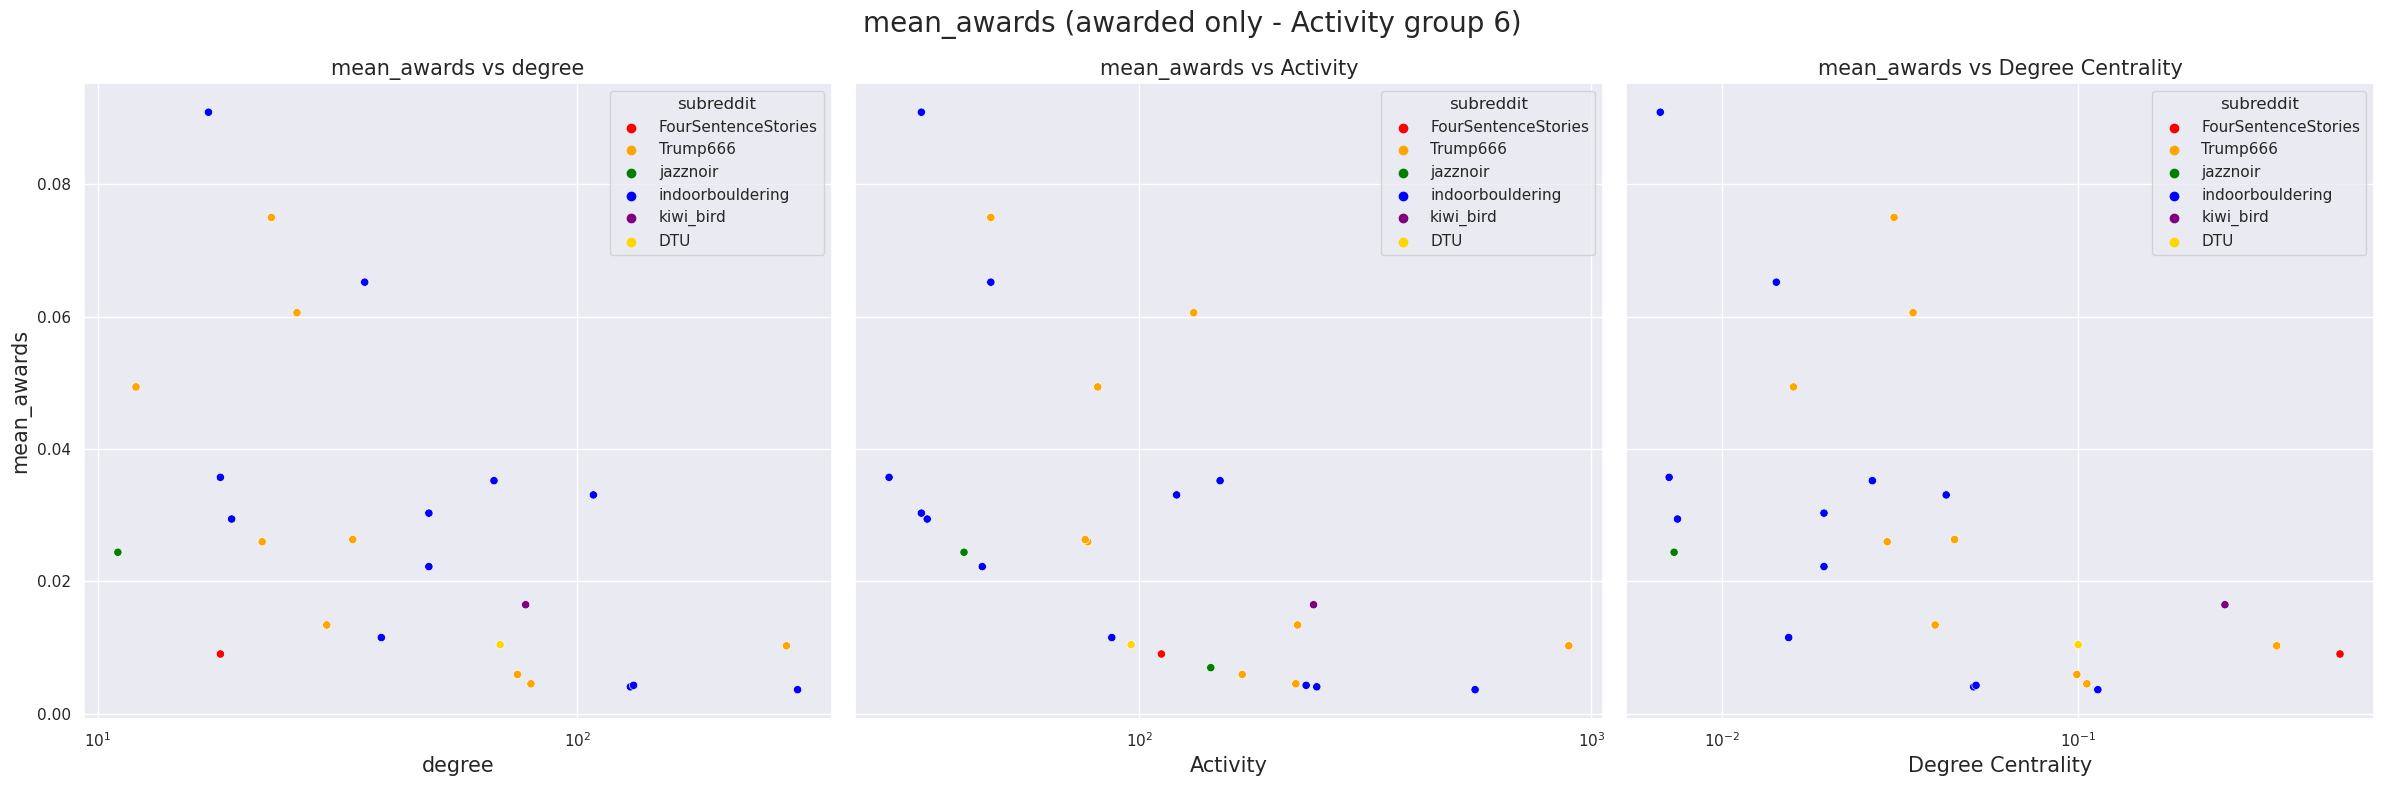

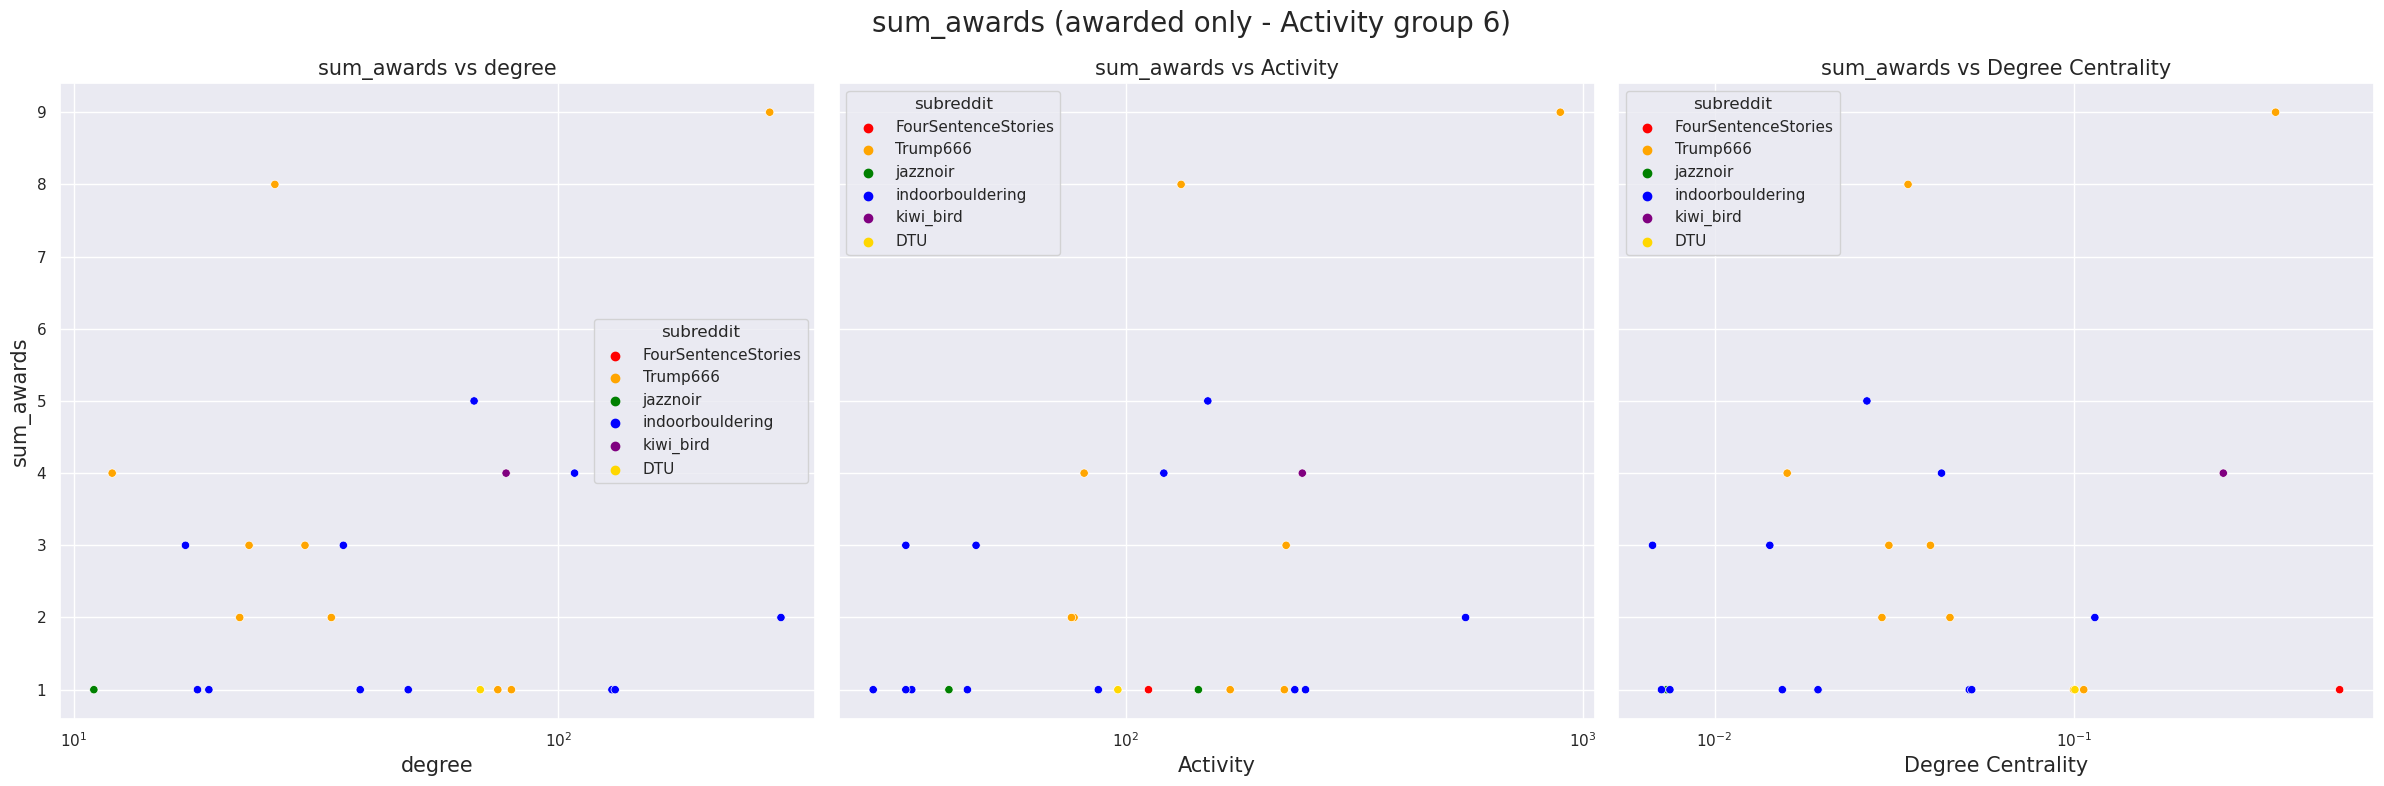

In [18]:
d=df_authors.loc[df_authors['Activity_group']==6]

fig, axs = plt.subplots(1, 3, figsize=(8*3,8*1),sharey=True)
axs = axs.flatten()
sns.scatterplot(y='mean_awards',x='degree',hue='subreddit',data=d.loc[d.mean_awards>0],palette=color_dict,ax=axs[0])
axs[0].set_title('mean_awards vs degree',fontsize=15)
axs[0].set_xscale('log')
axs[0].set_ylabel('mean_awards',fontsize=15)
axs[0].set_xlabel('degree',fontsize=15)

sns.scatterplot(y='mean_awards',x='Activity',hue='subreddit',data=d.loc[d.mean_awards>0],palette=color_dict,ax=axs[1])
axs[1].set_title('mean_awards vs Activity',fontsize=15)
axs[1].set_xscale('log')
axs[1].set_ylabel('mean_awards',fontsize=15)
axs[1].set_xlabel('Activity',fontsize=15)

sns.scatterplot(y='mean_awards',x='Degree Centrality',hue='subreddit',data=d.loc[d.mean_awards>0],palette=color_dict,ax=axs[2])
axs[2].set_title('mean_awards vs Degree Centrality',fontsize=15)
axs[2].set_ylabel('mean_awards',fontsize=15)
axs[2].set_xlabel('Degree Centrality',fontsize=15)
axs[2].set_xscale('log')

plt.suptitle('mean_awards (awarded only - Activity group 6)',fontsize=20)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(8*3,8*1),sharey=True)
axs = axs.flatten()
sns.scatterplot(y='sum_awards',x='degree',hue='subreddit',data=d.loc[d.sum_awards>0],palette=color_dict,ax=axs[0])
axs[0].set_title('sum_awards vs degree',fontsize=15)
axs[0].set_xscale('log')
axs[0].set_ylabel('sum_awards',fontsize=15)
axs[0].set_xlabel('degree',fontsize=15)

sns.scatterplot(y='sum_awards',x='Activity',hue='subreddit',data=d.loc[d.sum_awards>0],palette=color_dict,ax=axs[1])
axs[1].set_title('sum_awards vs Activity',fontsize=15)
axs[1].set_xscale('log')
axs[1].set_ylabel('sum_awards',fontsize=15)
axs[1].set_xlabel('Activity',fontsize=15)

sns.scatterplot(y='sum_awards',x='Degree Centrality',hue='subreddit',data=d.loc[d.sum_awards>0],palette=color_dict,ax=axs[2])
axs[2].set_title('sum_awards vs Degree Centrality',fontsize=15)
axs[2].set_ylabel('sum_awards',fontsize=15)
axs[2].set_xlabel('Degree Centrality',fontsize=15)
axs[2].set_xscale('log')

plt.suptitle('sum_awards (awarded only - Activity group 6)',fontsize=20)
plt.tight_layout()
plt.show()

/tmp/ipykernel_36593/3742265326.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_active_authors.loc[df_active_authors.award==True,'degree'],shade=True,label='Awarded',color='red',ax=axs[0])
/tmp/ipykernel_36593/3742265326.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_active_authors.loc[df_active_authors.award==False,'degree'],
/tmp/ipykernel_36593/3742265326.py:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_active_authors.loc[df_active_authors.award==True,'Activity'],shade=True,label='Awarded',color='red',ax=axs[1])
/tmp/ipykernel_36593/3742265326.py:15: FutureWarning: 

`shade` is now deprecated in 

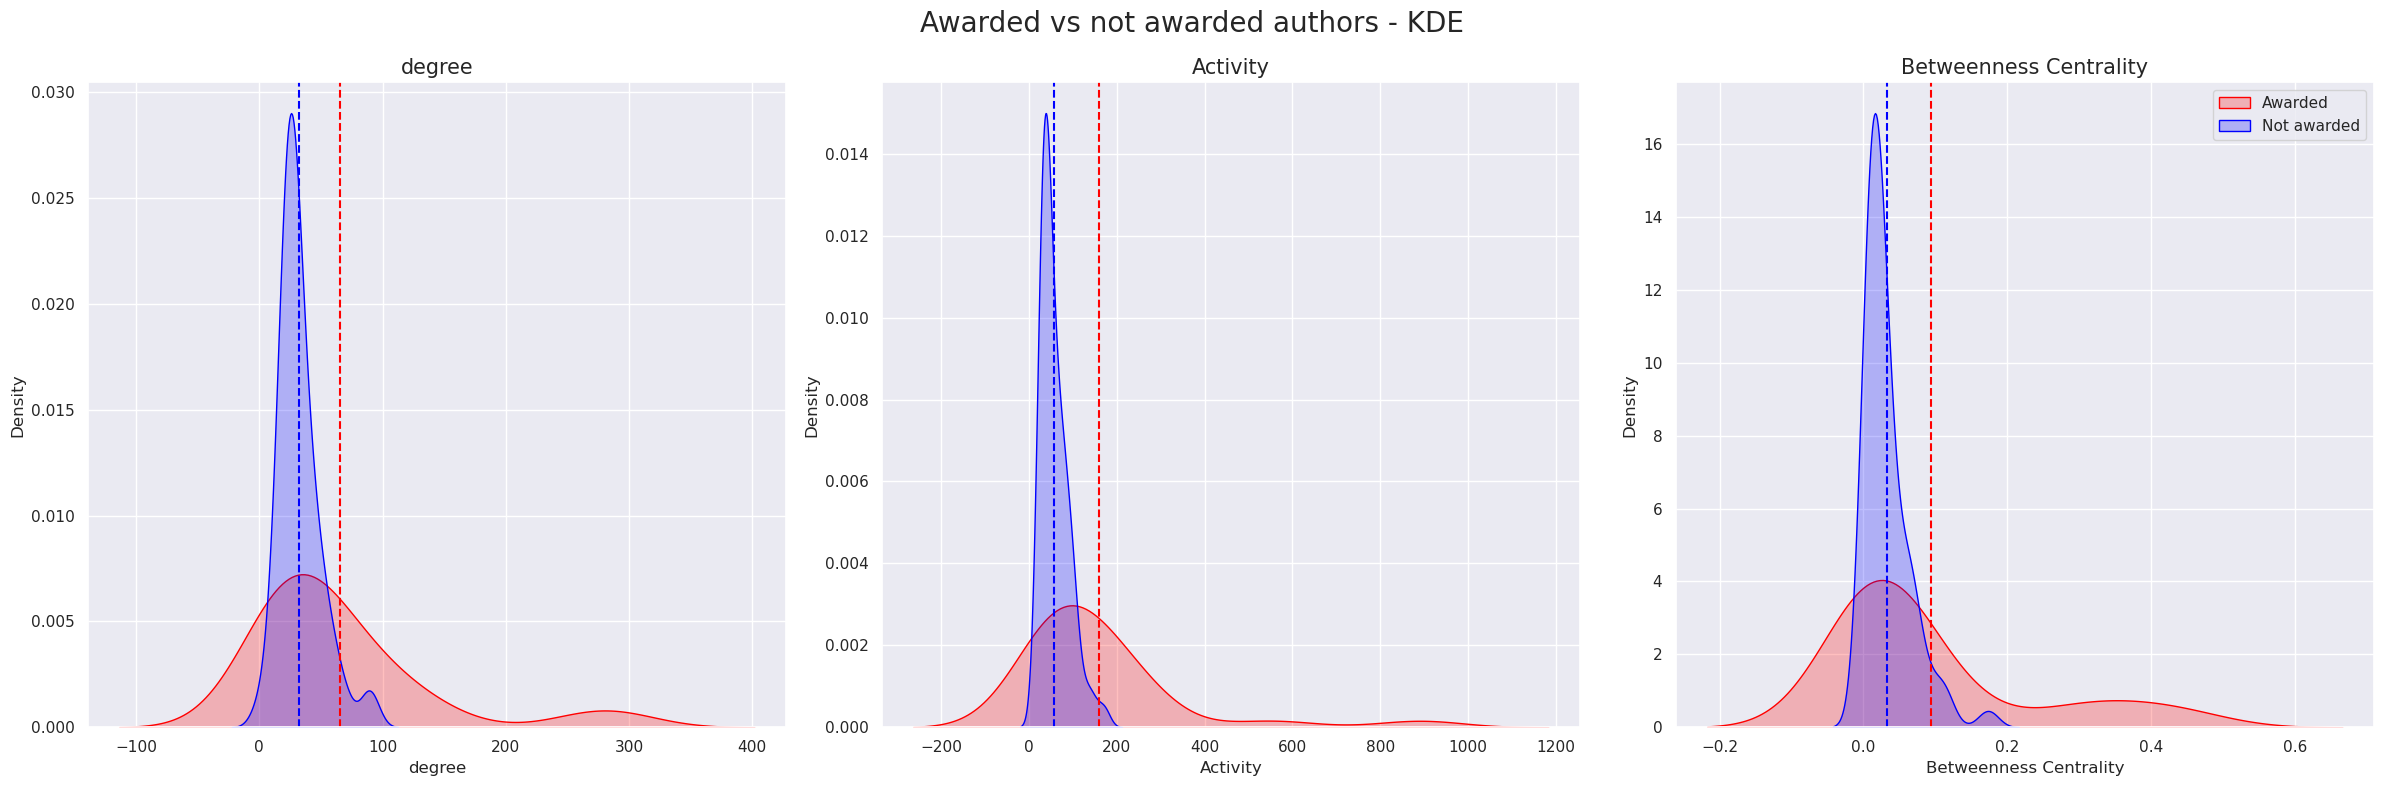

In [19]:
fig, axs = plt.subplots(1, 3, figsize=(8*3,8*1))

axs = axs.flatten()
df_active_authors=df_authors.loc[df_authors.Activity_group==6]

sns.kdeplot(df_active_authors.loc[df_active_authors.award==True,'degree'],shade=True,label='Awarded',color='red',ax=axs[0])
sns.kdeplot(df_active_authors.loc[df_active_authors.award==False,'degree'],
shade=True,label='Not awarded',color='blue',ax=axs[0])

axs[0].axvline(df_active_authors.loc[df_active_authors.award==True,'degree'].mean(),color='red',linestyle='--')
axs[0].axvline(df_active_authors.loc[df_active_authors.award==False,'degree'].mean(),color='blue',linestyle='--')
axs[0].set_title('degree',fontsize=15)

sns.kdeplot(df_active_authors.loc[df_active_authors.award==True,'Activity'],shade=True,label='Awarded',color='red',ax=axs[1])
sns.kdeplot(df_active_authors.loc[df_active_authors.award==False,'Activity'],shade=True,label='Not awarded',color='blue',ax=axs[1])
# mean lines
axs[1].axvline(df_active_authors.loc[df_active_authors.award==True,'Activity'].mean(),color='red',linestyle='--')
axs[1].axvline(df_active_authors.loc[df_active_authors.award==False,'Activity'].mean(),color='blue',linestyle='--')
axs[1].set_title('Activity',fontsize=15)    

sns.kdeplot(df_active_authors.loc[df_active_authors.award==True,'Betweenness Centrality'],shade=True,label='Awarded',color='red',ax=axs[2])
sns.kdeplot(df_active_authors.loc[df_active_authors.award==False,'Betweenness Centrality'],shade=True,label='Not awarded',color='blue',ax=axs[2])
axs[2].set_title('Betweenness Centrality',fontsize=15)
axs[2].axvline(df_active_authors.loc[df_active_authors.award==True,'Betweenness Centrality'].mean(),color='red',linestyle='--')
axs[2].axvline(df_active_authors.loc[df_active_authors.award==False,'Betweenness Centrality'].mean(),color='blue',linestyle='--')

plt.suptitle('Awarded vs not awarded authors - KDE',fontsize=20)
# legend
plt.legend()
plt.tight_layout()

plt.show()

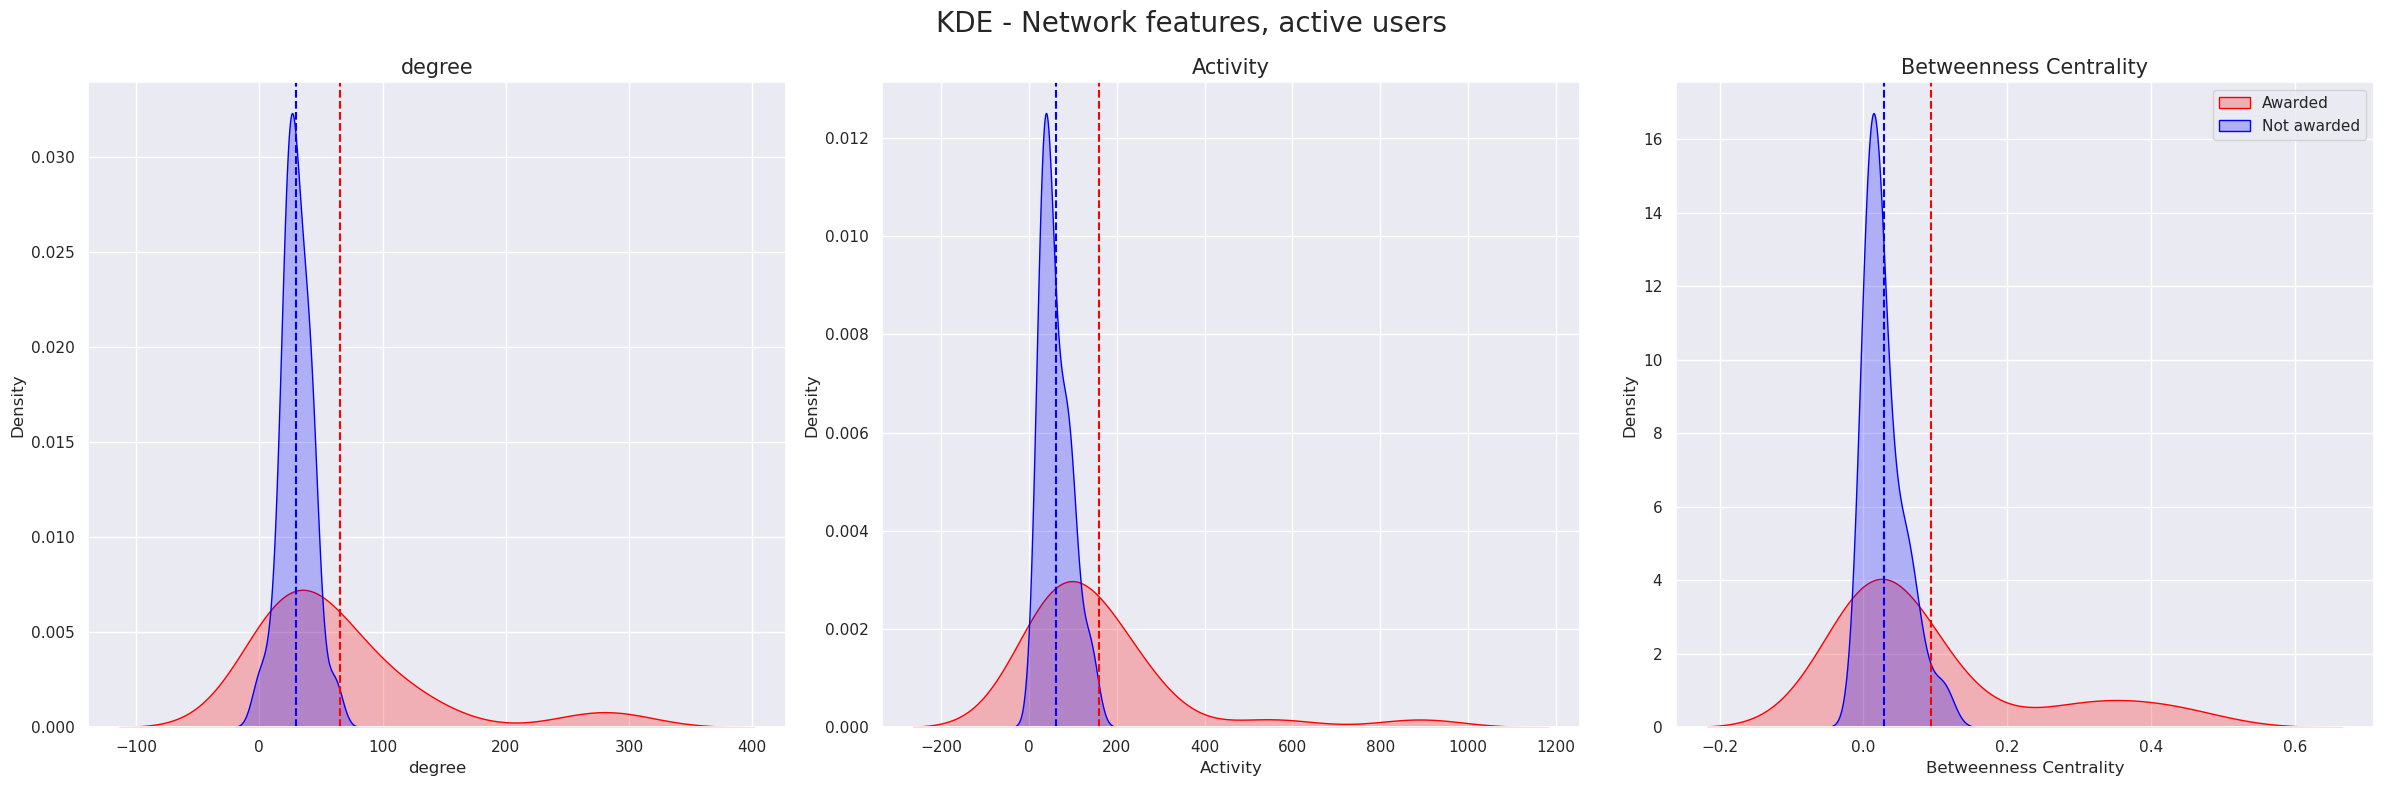

In [41]:
fig, axs = plt.subplots(1, 3, figsize=(8*3,8*1))

axs = axs.flatten()
df_active_authors=df_authors.loc[df_authors.Activity_group==6]
l = len(df_active_authors.loc[df_active_authors.award==True,'degree'])
df_na = df_active_authors.loc[df_active_authors.award==False].sample(l,random_state=42)
df_a = df_active_authors.loc[df_active_authors.award==True]

sns.kdeplot(df_a['degree'],fill=True,label='Awarded',color='red',ax=axs[0])
sns.kdeplot(df_na['degree'],fill=True,label='Not awarded',color='blue',ax=axs[0])

axs[0].axvline(df_a['degree'].mean(),color='red',linestyle='--')
axs[0].axvline(df_na['degree'].mean(),color='blue',linestyle='--')
axs[0].set_title('degree',fontsize=15)

sns.kdeplot(df_a['Activity'],fill=True,label='Awarded',color='red',ax=axs[1])
sns.kdeplot(df_na['Activity'],fill=True,label='Not awarded',color='blue',ax=axs[1])
# mean lines
axs[1].axvline(df_a['Activity'].mean(),color='red',linestyle='--')
axs[1].axvline(df_na['Activity'].mean(),color='blue',linestyle='--')
axs[1].set_title('Activity',fontsize=15)    

sns.kdeplot(df_a['Betweenness Centrality'],fill=True,label='Awarded',color='red',ax=axs[2])
sns.kdeplot(df_na['Betweenness Centrality'],fill=True,label='Not awarded',color='blue',ax=axs[2])
axs[2].set_title('Betweenness Centrality',fontsize=15)
axs[2].axvline(df_a['Betweenness Centrality'].mean(),color='red',linestyle='--')
axs[2].axvline(df_na['Betweenness Centrality'].mean(),color='blue',linestyle='--')

plt.suptitle('KDE - Network features, active users',fontsize=20)
# legend
plt.legend()
plt.tight_layout()

plt.show()

# PCA

In [ ]:
# PCA
# scale data
scaler = StandardScaler()
df_authors_scaled = scaler.fit_transform(df_authors[['degree','Activity','Betweenness Centrality','Degree Centrality','graph_size','graph_average_clustering','graph_average_shortest_path_length']])
df_authors_scaled = pd.DataFrame(df_authors_scaled,columns=['degree','Activity','Betweenness Centrality','Degree Centrality','graph_size','graph_average_clustering','graph_average_shortest_path_length'])

# PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_authors_scaled)
principalDf = pd.DataFrame(data = principalComponents
                , columns = ['principal component 1', 'principal component 2'])

# add labels
principalDf['award']=df_authors['award']
principalDf['subreddit']=df_authors['subreddit']

# plot
fig, axs = plt.subplots(1, 2, figsize=(8*2,8*1))
axs = axs.flatten()

sns.scatterplot(x='principal component 1',y='principal component 2',hue='subreddit',data=principalDf,palette=color_dict,ax=axs[0])
axs[0].set_title('PCA - subreddit',fontsize=15)

sns.scatterplot(x='principal component 1',y='principal component 2',hue='award',data=principalDf,palette={True:'red',False:'blue'},ax=axs[1])
axs[1].set_title('PCA - award',fontsize=15)

plt.suptitle('PCA',fontsize=22)
plt.tight_layout()
plt.show()

# print explained variance
print('Explained variance: ',pca.explained_variance_ratio_)

KeyError: "['graph_average_clustering', 'graph_average_shortest_path_length'] not in index"

# Random Forrest

RMSE: 0.129493
R2: 0.100005


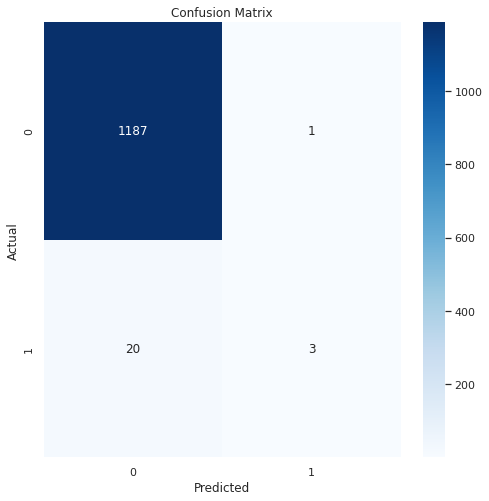

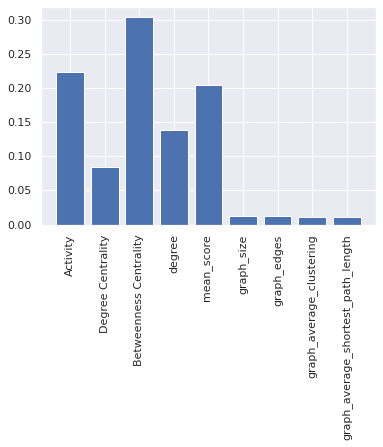

In [ ]:
# random forrest test
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

df_authors.head()

# remove columns
df_authors_model = df_authors.drop(columns=['sum_awards','sum_score','subreddit','author','type','mean_awards','sum_awards'])

# nan rows
df_authors_model = df_authors_model.dropna()

# split data into train and test sets
train, test = train_test_split(df_authors_model, test_size=0.2)

# split data into X and y
X_train = train.drop(columns=['award'])
y_train = train['award']
X_test = test.drop(columns=['award'])
y_test = test['award']

# create model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# fit model
rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

# evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('RMSE: %f' % (rmse))
print('R2: %f' % (r2))

# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# confusion matrix
cm = confusion_matrix(y_test, y_pred.round())
# plot
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
plt.show()


# plot feature importance
importance = rf.feature_importances_
# plot feature importance
plt.bar([x for x in X_train.columns], importance)
plt.xticks(rotation=90)
plt.show()

## for post & comments


100%|██████████| 7/7 [02:39<00:00, 22.85s/it]


RMSE: 0.094938
R2: 0.001319


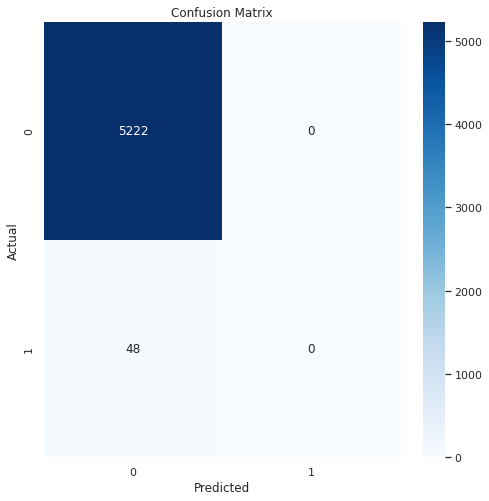

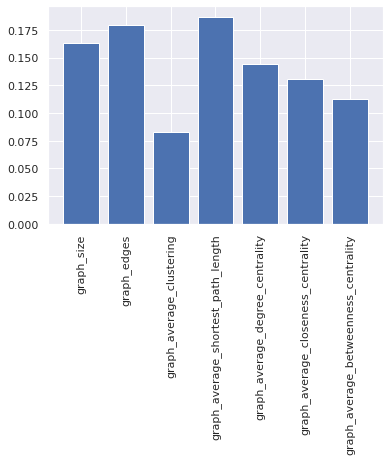

In [ ]:
for subreddit in subreddits:
    df_comment_dict[subreddit]['subreddit'] = subreddit
    df_post_dict[subreddit]['subreddit'] = subreddit
# concat all comments in dict
com = pd.concat(df_comment_dict, ignore_index=True)[['award','id','subreddit','author','score']]
po = pd.concat(df_post_dict, ignore_index=True)[['award','id','subreddit','author','score']]

df_com_po = pd.concat([com,po], ignore_index=True)
df_com_po['score'] = df_com_po['score'].astype(int)
# df_com_po

for subreddit in tqdm.tqdm(subreddits):
    df_com_po.loc[df_com_po['subreddit']==subreddit,'graph_size'] = G_dict[subreddit].number_of_nodes()
    df_com_po.loc[df_com_po['subreddit']==subreddit,'graph_edges'] = G_dict[subreddit].number_of_edges()
    df_com_po.loc[df_com_po['subreddit']==subreddit,'graph_average_clustering'] = nx.average_clustering(G_dict[subreddit])
    df_com_po.loc[df_com_po['subreddit']==subreddit,'graph_average_shortest_path_length'] = nx.average_shortest_path_length(G_dict[subreddit])
    df_com_po.loc[df_com_po['subreddit']==subreddit,'graph_average_degree_centrality'] = np.mean([d for n, d in nx.degree_centrality(G_dict[subreddit]).items()])
    df_com_po.loc[df_com_po['subreddit']==subreddit,'graph_average_closeness_centrality'] = np.mean([d for n, d in nx.closeness_centrality(G_dict[subreddit]).items()])
    df_com_po.loc[df_com_po['subreddit']==subreddit,'graph_average_betweenness_centrality'] = np.mean([d for n, d in nx.betweenness_centrality(G_dict[subreddit]).items()])
    


# remove columns
df_com_po_model = df_com_po.drop(columns=['subreddit','author','id','score'])

# replace nan with zero
df_com_po_model = df_com_po_model.fillna(0)

# split data into train and test sets
train, test = train_test_split(df_com_po_model, test_size=0.2)

# split data into X and y
X_train = train.drop(columns=['award'])
y_train = train['award']
X_test = test.drop(columns=['award'])
y_test = test['award']

# create model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# fit model
rf.fit(X_train, y_train)

# predict
y_pred = rf.predict(X_test)

# evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print('RMSE: %f' % (rmse))
print('R2: %f' % (r2))

# confusion matrix
cm = confusion_matrix(y_test, y_pred.round())
# plot
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d',cmap='Blues',ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')
plt.show()


# plot feature importance
importance = rf.feature_importances_
# plot feature importance
plt.bar([x for x in X_train.columns], importance)
plt.xticks(rotation=90)
plt.show()

# WSB

In [ ]:
import pandas as pd
from tqdm import tqdm
import praw
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy.stats import norm
sns.set_theme()

In [ ]:
sample = pd.read_csv('/home/pelle/Master_Thesis/data/raw/wallstreetbets/submissions_pmaw_2016-2021_wsb.csv',nrows=10)
dtypes = sample.dtypes # Get the dtypes
cols = sample.columns # Get the columns
dtype_dictionary = {} 
for c in cols:
    if str(dtypes[c]) == 'int64':
        dtype_dictionary[c] = 'float32' # Handle NANs in int columns
    else:
        dtype_dictionary[c] = str(dtypes[c])

df_posts = pd.read_csv('/home/pelle/Master_Thesis/data/raw/wallstreetbets/submissions_pmaw_2016-2021_wsb.csv',dtype=dtype_dictionary, 
                keep_default_na=False,
                na_values=['na',''],
                usecols=['author','created_utc','score','id'])
df_posts.created_utc = pd.to_datetime(df_posts.created_utc,unit='s')

## 1RONYMAN

In [ ]:
# Read-only instance
def get_reddit_instance():
    reddit = praw.Reddit(client_id="OlWj7Mu4aXh0eg",
                                client_secret="fIzRhpEeBYAwi8_i2hcyzoWwDnWOag",
                                user_agent="Scrapper")
    return reddit

reddit = get_reddit_instance()

def get_n_awards(id):
    submission_awards = []
    submission = reddit.submission(id=id)
    submission_awards.append(submission.all_awardings)
    # get number of awards
    return [len(x) for x in submission_awards]

L=len(df_posts.loc[df_posts['author']=='1R0NYMAN'])
df_posts_10 = df_posts.groupby('author').filter(lambda x: len(x) == L)

authors = df_posts_10.author.unique()
# pick n random authors
n = 100
authors = np.random.choice(authors, n, replace=False)
authors = np.append(authors,'1R0NYMAN')

df_posts_10 = df_posts_10.loc[df_posts_10['author'].isin(authors)]
df_posts_10['award'] = df_posts_10['id'].apply(get_n_awards)
df_posts_10['award']=df_posts_10['award'].apply(lambda x: x[0])

/tmp/ipykernel_3879/4206699822.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group=df_posts_10.groupby('author').sum().sort_values(by='award',ascending=False)


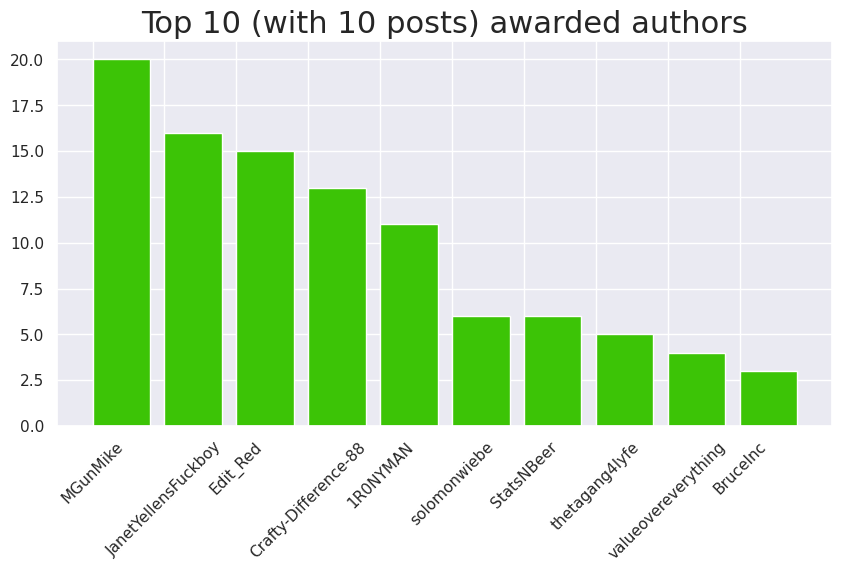

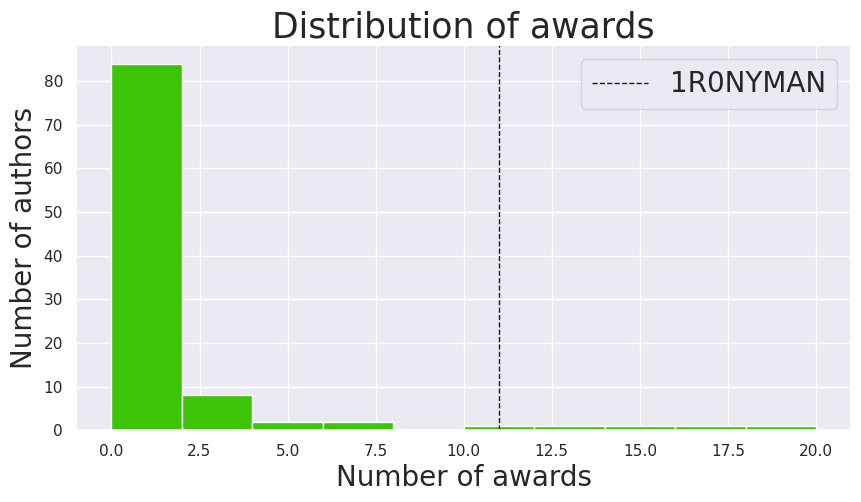

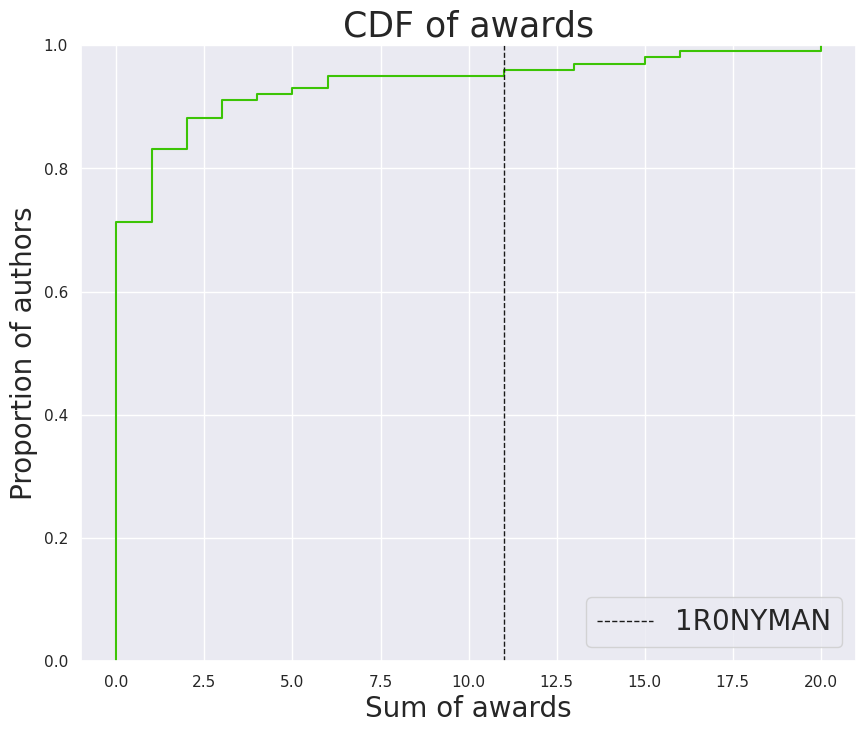

P-value: 0.0396


In [ ]:
group=df_posts_10.groupby('author').sum().sort_values(by='award',ascending=False)

plt.figure(figsize=(10,5))
plt.bar(group.head(10).index, group.head(10)['award'], label='awards', align='edge',color='#3cc406')
plt.xticks(rotation=45)
plt.title('Top 10 (with 10 posts) awarded authors',fontsize=22)
plt.show()

plt.figure(figsize=(10,5),dpi=100)
plt.hist(group['award'],align='mid',color='#3cc406')
plt.title('Distribution of awards',fontsize=25)
plt.axvline(group.loc['1R0NYMAN']['award'], color='k', linestyle='dashed', linewidth=1, label='1R0NYMAN')
plt.xlabel('Number of awards',fontsize=20)
plt.ylabel('Number of authors',fontsize=20)
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(10,8),dpi=100)
sns.ecdfplot(group['award'],stat='proportion',color='#3cc406')
plt.axvline(group.loc['1R0NYMAN']['award'], color='k', linestyle='dashed', linewidth=1,label='1R0NYMAN')
plt.xlabel('Sum of awards',fontsize=20)
plt.ylabel('Proportion of authors',fontsize=20)
plt.title('CDF of awards',fontsize=25)
plt.legend(fontsize=20)
plt.show()

p_value = np.array(np.array(group['award']) > group.loc['1R0NYMAN']['award']).sum() / len(group['award'])
print('P-value: '+str(p_value.round(5)))

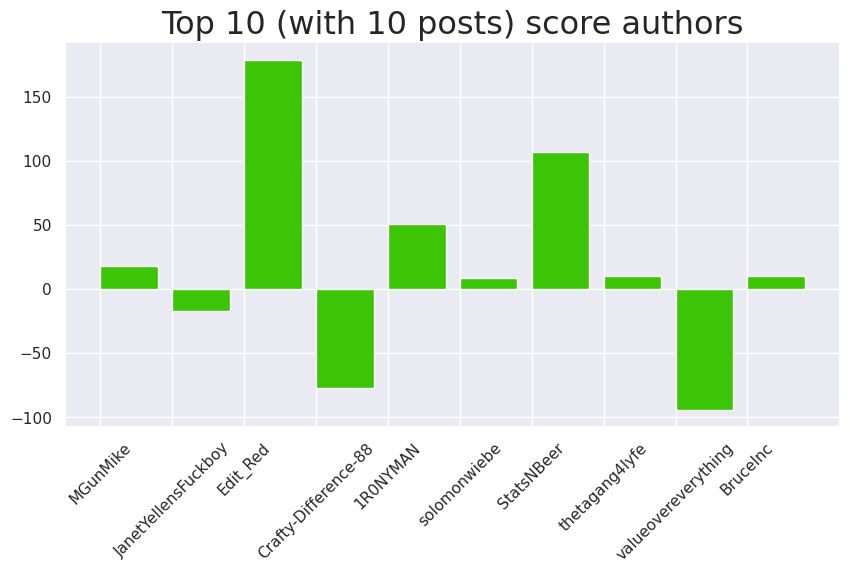

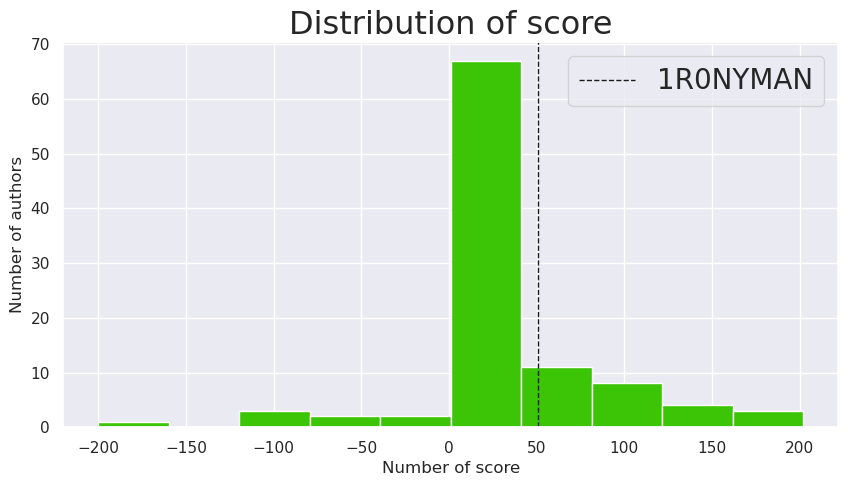

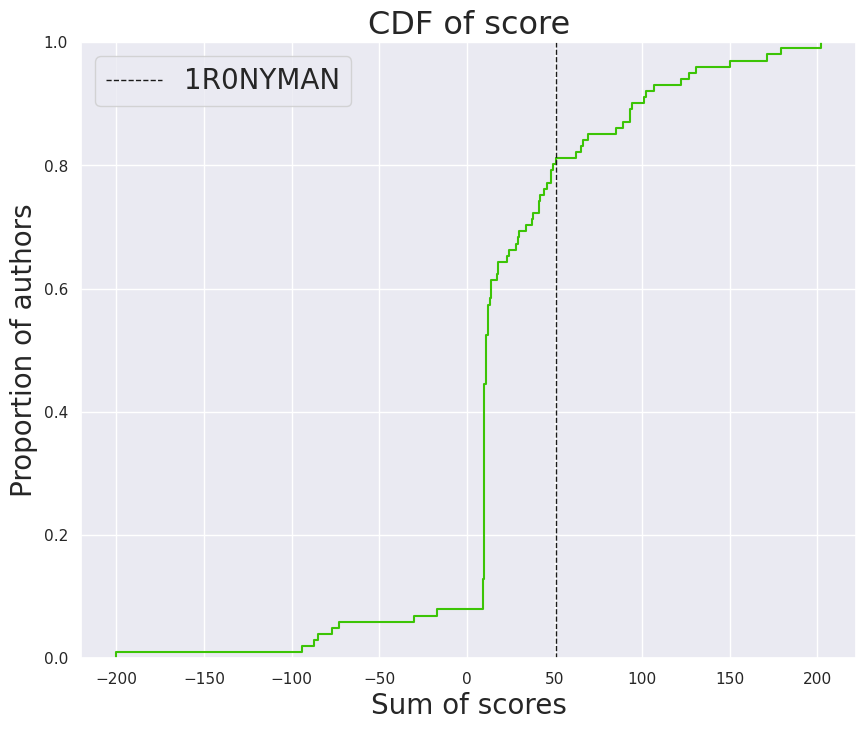

P-value: 0.18812


In [ ]:
df_posts_10 = df_posts_10.loc[df_posts_10['author'].isin(authors)]

plt.figure(figsize=(10,5))
plt.bar(group.head(10).index, group.head(10)['score'], label='awards', align='edge',color='#3cc406')
plt.xticks(rotation=45)
plt.title('Top 10 (with 10 posts) score authors',fontsize=23)
plt.show()

plt.figure(figsize=(10,5),dpi=100)
plt.hist(group['score'],align='mid',color='#3cc406')
plt.title('Distribution of score',fontsize=23)
plt.axvline(group.loc['1R0NYMAN']['score'], color='k', linestyle='dashed', linewidth=1, label='1R0NYMAN')
plt.xlabel('Number of score')
plt.ylabel('Number of authors')
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(10,8),dpi=100)
sns.ecdfplot(group['score'],stat='proportion',color='#3cc406')
plt.axvline(group.loc['1R0NYMAN']['score'], color='k', linestyle='dashed', linewidth=1,label='1R0NYMAN')
plt.title('CDF of score',fontsize=23)
plt.xlabel('Sum of scores',fontsize=20)
plt.ylabel('Proportion of authors',fontsize=20)
plt.legend(fontsize=20)
plt.show()

p_value = np.array(np.array(group['score']) > group.loc['1R0NYMAN']['score']).sum() / len(group['score'])
print('P-value: '+str(p_value.round(5)))

## ControlTheNarative

In [ ]:
# Read-only instance
def get_reddit_instance():
    reddit = praw.Reddit(client_id="OlWj7Mu4aXh0eg",
                                client_secret="fIzRhpEeBYAwi8_i2hcyzoWwDnWOag",
                                user_agent="Scrapper")
    return reddit

reddit = get_reddit_instance()

def get_n_awards(id):
    submission_awards = []
    submission = reddit.submission(id=id)
    submission_awards.append(submission.all_awardings)
    # get number of awards
    return [len(x) for x in submission_awards]

L=len(df_posts.loc[df_posts['author']=='ControlTheNarrative'])
df_posts_10 = df_posts.groupby('author').filter(lambda x: len(x) == L)

authors = df_posts_10.author.unique()
# pick n random authors
n = 100
authors = np.random.choice(authors, n, replace=False)
authors = np.append(authors,'ControlTheNarrative')

df_posts_10 = df_posts_10.loc[df_posts_10['author'].isin(authors)]
df_posts_10['award'] = df_posts_10['id'].apply(get_n_awards)
df_posts_10['award']=df_posts_10['award'].apply(lambda x: x[0])

/tmp/ipykernel_3879/4195264474.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group=df_posts_10.groupby('author').sum().sort_values(by='award',ascending=False)


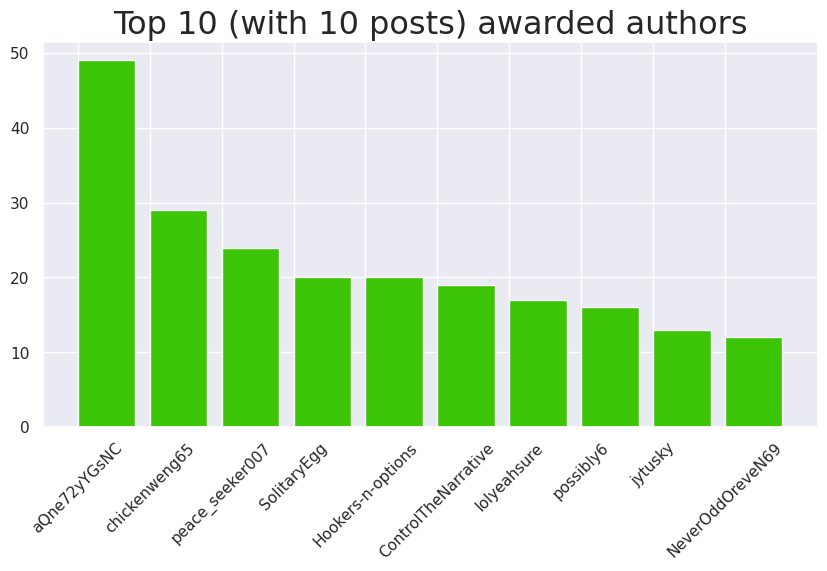

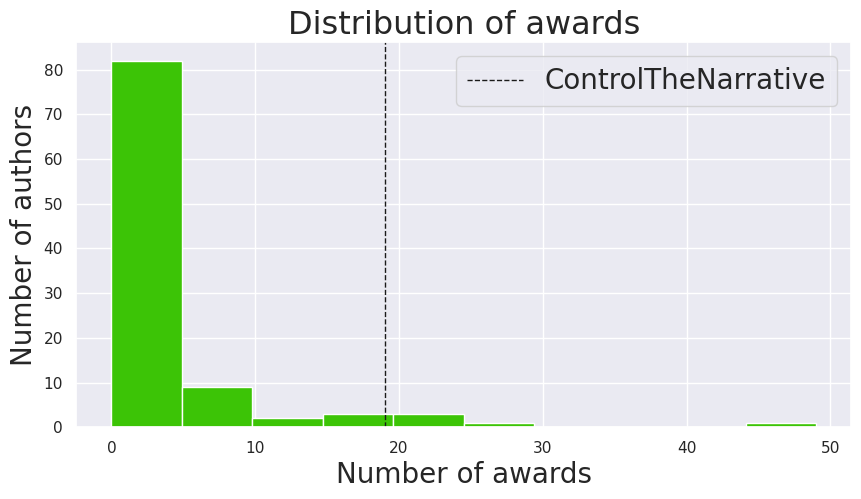

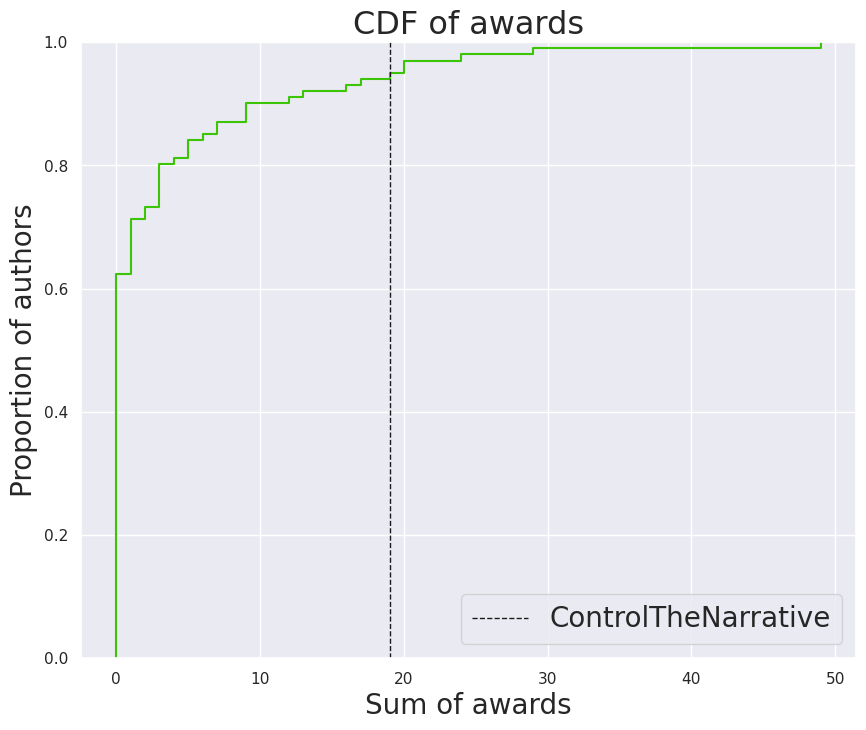

P-value: 0.0495


In [ ]:
group=df_posts_10.groupby('author').sum().sort_values(by='award',ascending=False)

plt.figure(figsize=(10,5))
plt.bar(group.head(10).index, group.head(10)['award'], label='awards', align='edge',color='#3cc406')
plt.xticks(rotation=45)
plt.title('Top 10 (with 10 posts) awarded authors',fontsize=23)
plt.show()

plt.figure(figsize=(10,5),dpi=100)
plt.hist(group['award'],align='mid',color='#3cc406')
plt.title('Distribution of awards',fontsize=23)
plt.axvline(group.loc['ControlTheNarrative']['award'], color='k', linestyle='dashed', linewidth=1, label='ControlTheNarrative')
plt.xlabel('Number of awards',fontsize=20)
plt.ylabel('Number of authors',fontsize=20)
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(10,8),dpi=100)
sns.ecdfplot(group['award'],stat='proportion',color='#3cc406')
plt.axvline(group.loc['ControlTheNarrative']['award'], color='k', linestyle='dashed', linewidth=1,label='ControlTheNarrative')
plt.xlabel('Sum of awards',fontsize=20)
plt.ylabel('Proportion of authors',fontsize=20)
plt.title('CDF of awards',fontsize=23)
plt.legend(fontsize=20)
plt.show()

p_value = np.array(np.array(group['award']) > group.loc['ControlTheNarrative']['award']).sum() / len(group['award'])
print('P-value: '+str(p_value.round(5)))

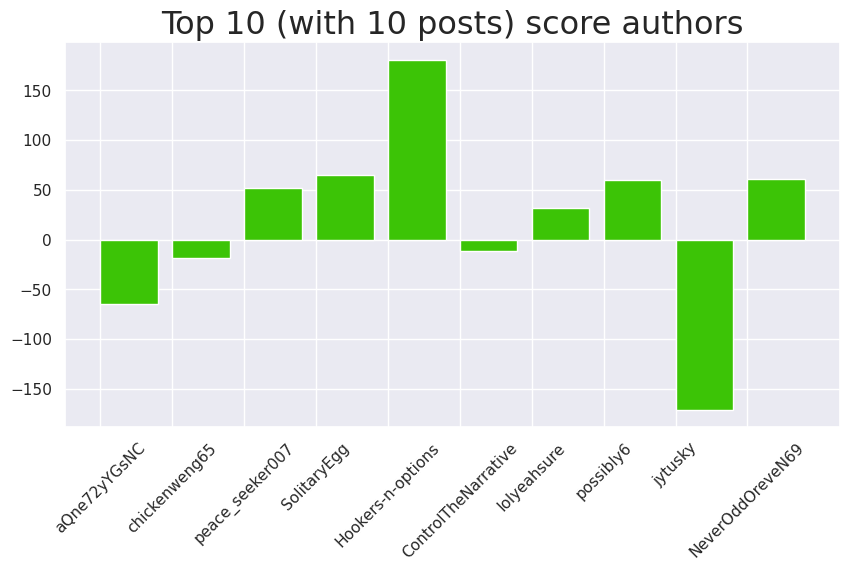

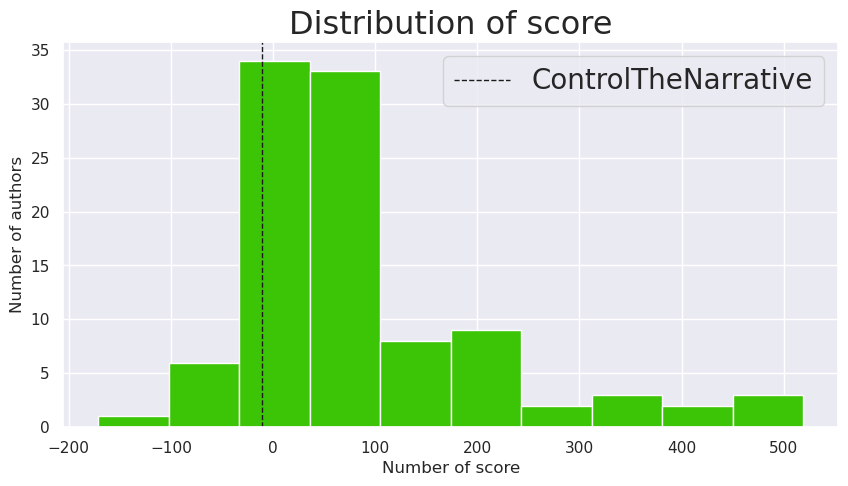

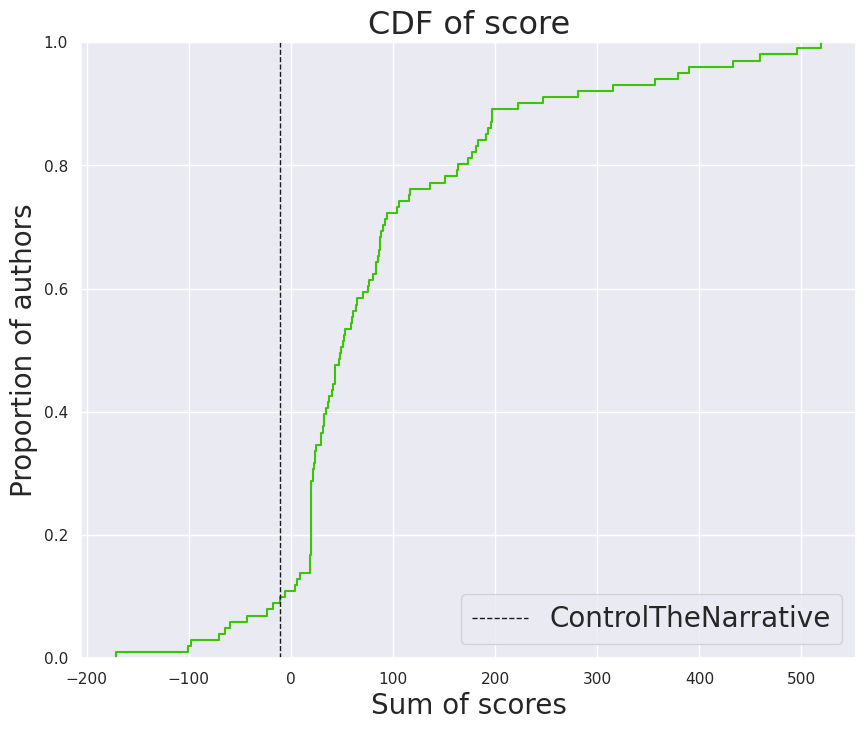

P-value: 0.90099


In [ ]:
df_posts_10 = df_posts_10.loc[df_posts_10['author'].isin(authors)]

plt.figure(figsize=(10,5))
plt.bar(group.head(10).index, group.head(10)['score'], label='awards', align='edge',color='#3cc406')
plt.xticks(rotation=45)
plt.title('Top 10 (with 10 posts) score authors',fontsize=23)
plt.show()

plt.figure(figsize=(10,5),dpi=100)
plt.hist(group['score'],align='mid',color='#3cc406')
plt.title('Distribution of score',fontsize=23)
plt.axvline(group.loc['ControlTheNarrative']['score'], color='k', linestyle='dashed', linewidth=1, label='ControlTheNarrative')
plt.xlabel('Number of score')
plt.ylabel('Number of authors')
plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(10,8),dpi=100)
sns.ecdfplot(group['score'],stat='proportion',color='#3cc406')
plt.axvline(group.loc['ControlTheNarrative']['score'], color='k', linestyle='dashed', linewidth=1,label='ControlTheNarrative')
plt.title('CDF of score',fontsize=23)
plt.xlabel('Sum of scores',fontsize=20)
plt.ylabel('Proportion of authors',fontsize=20)
plt.legend(fontsize=20)
plt.show()

p_value = np.array(np.array(group['score']) > group.loc['ControlTheNarrative']['score']).sum() / len(group['score'])
print('P-value: '+str(p_value.round(5)))